In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings;
warnings.filterwarnings('ignore');

In [2]:
df = pd.read_csv("C:\\Users\\midhu\\Downloads\\YourCabs.csv")
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [3]:
df.shape

(43431, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [5]:
df.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000


In [6]:
values = df.isnull().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending= False)
values

,0
to_city_id,96.343626
package_id,82.616104
from_city_id,62.365591
to_long,21.040271
to_lat,21.040271
to_area_id,21.040271
from_long,0.214133
from_lat,0.214133
from_area_id,0.202620
id,0.000000


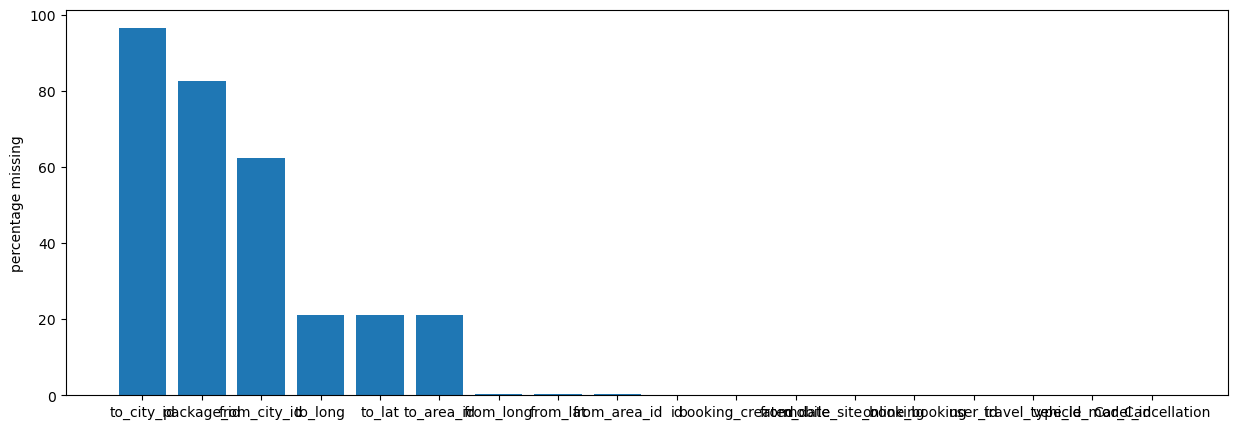

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(values.index, values.values.T[0])
plt.xticks()
plt.ylabel("percentage missing")
plt.show()

In [8]:
df

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [9]:
df

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43428,185939,48729,12,1.0,3,974.0,NaN,15.0,NaN,11/24/2013 18:30,0,0,11/24/2013 14:35,13.075570,77.559040,NaN,NaN,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [10]:
df["Car_Cancellation"].value_counts()

Car_Cancellation
0    40299
1     3132
Name: count, dtype: int64

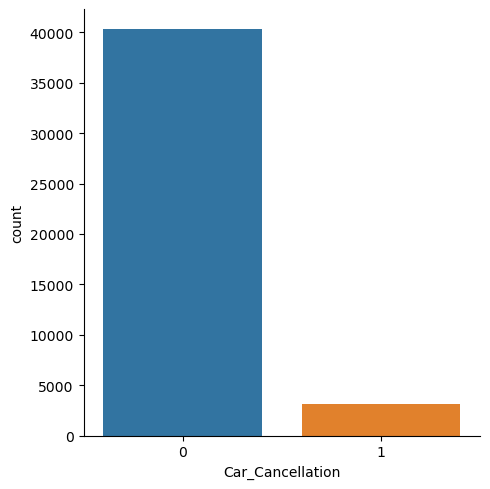

In [11]:
sns.catplot(data=df,x='Car_Cancellation' , kind = 'count')

In [12]:
unique_id = df["travel_type_id"].unique()
unique_id

array([2, 1, 3], dtype=int64)

In [13]:
df1=df[df['travel_type_id']==unique_id[0]]
df2=df[df['travel_type_id']==unique_id[1]]
df3=df[df['travel_type_id']==unique_id[2]]

df1

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,185936,30220,12,NaN,2,585.0,1226.0,15.0,NaN,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0
43426,185937,14364,12,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,185938,48727,12,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43429,185940,30724,87,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [14]:
df2

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
158,132697,22275,28,NaN,1,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
216,132760,22310,87,NaN,1,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43342,185843,48667,12,NaN,1,393.0,NaN,15.0,191.0,11/23/2013 22:00,1,0,11/23/2013 17:54,13.199560,77.706880,NaN,NaN,0
43385,185889,48697,87,NaN,1,119.0,NaN,15.0,146.0,11/29/2013 14:00,1,0,11/23/2013 23:24,13.047580,77.591840,NaN,NaN,0
43386,185891,48699,12,NaN,1,1281.0,NaN,15.0,32.0,11/24/2013 7:30,1,0,11/23/2013 23:44,12.934634,77.611283,NaN,NaN,0
43393,185899,48704,12,NaN,1,393.0,NaN,15.0,116.0,11/24/2013 10:30,0,0,11/24/2013 7:14,13.199560,77.706880,NaN,NaN,0


In [15]:
df3

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,132538,21995,12,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,132552,22201,12,1.0,3,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,132569,15846,12,2.0,3,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415,185924,48719,12,1.0,3,768.0,NaN,15.0,NaN,11/24/2013 16:00,0,1,11/24/2013 12:32,12.989990,77.553320,NaN,NaN,0
43417,185927,41939,12,4.0,3,1390.0,NaN,15.0,NaN,11/24/2013 15:00,0,0,11/24/2013 13:06,12.969368,77.641302,NaN,NaN,0
43420,185930,36265,65,2.0,3,1237.0,NaN,15.0,NaN,11/25/2013 1:00,1,0,11/24/2013 13:54,12.926450,77.612060,NaN,NaN,0
43424,185935,48726,12,2.0,3,515.0,NaN,15.0,NaN,11/24/2013 15:15,0,0,11/24/2013 14:23,12.978960,77.673450,NaN,NaN,0


In [16]:
df1.isnull().sum().div(df1.shape[0]).mul(100).sort_values(ascending=False)

package_id             100.000000
to_city_id             100.000000
from_city_id            57.704421
id                       0.000000
mobile_site_booking      0.000000
to_long                  0.000000
to_lat                   0.000000
from_long                0.000000
from_lat                 0.000000
booking_created          0.000000
from_date                0.000000
online_booking           0.000000
user_id                  0.000000
to_area_id               0.000000
from_area_id             0.000000
travel_type_id           0.000000
vehicle_model_id         0.000000
Car_Cancellation         0.000000
dtype: float64

In [17]:
df1.drop(['vehicle_model_id'],axis=1,inplace=True)
df1.drop(['package_id'],axis=1,inplace=True)
del df1['from_city_id']
del df1['to_city_id']
del df1['travel_type_id']

In [18]:
#since we want to split the "from date" to specific columns for better understanding

In [19]:
df1['from_date'] = pd.to_datetime(df1['from_date'], format='mixed')                    
#df1['from_date'] = df1['from_date'].apply(parse_dates)
df1['day'] = df1['from_date'].dt.day
df1['month'] = df1['from_date'].dt.month
df1['weekday'] = df1['from_date'].dt.weekday
df1['time'] = df1['from_date'].dt.time
df1['is_weekend'] = df1['from_date'].dt.weekday >= 5
df1.head()


,id,user_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,day,month,weekday,time,is_weekend
0,132512,22177,83.0,448.0,2013-01-01 02:00:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0,1,1,1,02:00:00,False
1,132513,21413,1010.0,540.0,2013-01-01 09:00:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0,1,1,1,09:00:00,False
2,132514,22178,1301.0,1034.0,2013-01-01 03:30:00,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0,1,1,1,03:30:00,False
3,132515,13034,768.0,398.0,2013-01-01 05:45:00,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0,1,1,1,05:45:00,False
4,132517,22180,1365.0,849.0,2013-01-01 09:00:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0,1,1,1,09:00:00,False


In [20]:
#same for "bookinng_created column"
df1['booking_created'] = pd.to_datetime(df1['booking_created'], format='mixed')                    
#df1['booking_created'] = df1['booking_created'].apply(parse_dates)
df1['day'] = df1['booking_created'].dt.day
df1['month'] = df1['booking_created'].dt.month
df1['weekday'] = df1['booking_created'].dt.weekday
df1['time'] = df1['booking_created'].dt.time
df1['is_weekend'] = df1['booking_created'].dt.weekday >= 5
df1.head()

,id,user_id,from_area_id,to_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,day,month,weekday,time,is_weekend
0,132512,22177,83.0,448.0,2013-01-01 02:00:00,0,0,2013-01-01 01:39:00,12.924150,77.672290,12.927320,77.635750,0,1,1,1,01:39:00,False
1,132513,21413,1010.0,540.0,2013-01-01 09:00:00,0,0,2013-01-01 02:25:00,12.966910,77.749350,12.927680,77.626640,0,1,1,1,02:25:00,False
2,132514,22178,1301.0,1034.0,2013-01-01 03:30:00,0,0,2013-01-01 03:08:00,12.937222,77.626915,13.047926,77.597766,0,1,1,1,03:08:00,False
3,132515,13034,768.0,398.0,2013-01-01 05:45:00,0,0,2013-01-01 04:39:00,12.989990,77.553320,12.971430,77.639140,0,1,1,1,04:39:00,False
4,132517,22180,1365.0,849.0,2013-01-01 09:00:00,0,0,2013-01-01 07:53:00,12.845653,77.677925,12.954340,77.600720,0,1,1,1,07:53:00,False


In [21]:
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c


haversine_vectorized = np.vectorize(haversine_np)
df1['distance_km'] = haversine_vectorized(df1['from_lat'], df1['from_long'], df1['to_lat'], df1['to_long'])
df1['time_to_travel'] = (df1['from_date'] - df1['booking_created']).dt.total_seconds() / 3600
df1 = df1.drop(columns=['from_lat', 'from_long', 'to_lat', 'from_date', 'booking_created'])




In [22]:
df1.head(10)

,id,user_id,from_area_id,to_area_id,online_booking,mobile_site_booking,to_long,Car_Cancellation,day,month,weekday,time,is_weekend,distance_km,time_to_travel
0,132512,22177,83.0,448.0,0,0,77.635750,0,1,1,1,01:39:00,False,3.975764,0.350000
1,132513,21413,1010.0,540.0,0,0,77.626640,0,1,1,1,02:25:00,False,13.995033,6.583333
2,132514,22178,1301.0,1034.0,0,0,77.597766,0,1,1,1,03:08:00,False,12.708414,0.366667
3,132515,13034,768.0,398.0,0,0,77.639140,0,1,1,1,04:39:00,False,9.525153,1.100000
4,132517,22180,1365.0,849.0,0,0,77.600720,0,1,1,1,07:53:00,False,14.699782,1.116667
5,132518,17712,1021.0,1323.0,0,0,77.653211,0,1,1,1,08:01:00,False,21.115265,14.483333
7,132520,22181,1192.0,832.0,0,0,77.645580,0,1,1,1,09:39:00,False,13.331020,1.350000
9,132522,22184,516.0,376.0,0,0,77.660810,0,1,1,1,09:49:00,False,11.473827,1.183333
10,132523,4941,150.0,776.0,0,0,77.677960,0,1,1,1,09:55:00,False,14.996545,1.083333
11,132524,17037,455.0,1330.0,0,0,77.706510,0,1,1,1,09:59:00,False,6.010725,2.766667


In [23]:
#splitting the time into hr,min,sec

In [24]:
df1['time'] = df1['time'].astype(str)
df1[['hours', 'minutes', 'seconds']] = df1['time'].str.split(':', expand=True)
df1[['hours', 'minutes', 'seconds']] = df1[['hours', 'minutes', 'seconds']].astype(int)
df1.drop(columns = ["time"])



,id,user_id,from_area_id,to_area_id,online_booking,mobile_site_booking,to_long,Car_Cancellation,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes,seconds
0,132512,22177,83.0,448.0,0,0,77.635750,0,1,1,1,False,3.975764,0.350000,1,39,0
1,132513,21413,1010.0,540.0,0,0,77.626640,0,1,1,1,False,13.995033,6.583333,2,25,0
2,132514,22178,1301.0,1034.0,0,0,77.597766,0,1,1,1,False,12.708414,0.366667,3,8,0
3,132515,13034,768.0,398.0,0,0,77.639140,0,1,1,1,False,9.525153,1.100000,4,39,0
4,132517,22180,1365.0,849.0,0,0,77.600720,0,1,1,1,False,14.699782,1.116667,7,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,185936,30220,585.0,1226.0,0,1,77.677960,0,24,11,6,True,12.174196,9.600000,14,24,0
43426,185937,14364,1147.0,452.0,1,0,77.590880,0,24,11,6,True,10.711968,3.583333,14,25,0
43427,185938,48727,393.0,466.0,1,0,77.644580,0,24,11,6,True,21.345603,34.500000,14,30,0
43429,185940,30724,1263.0,542.0,0,0,77.622890,0,24,11,6,True,4.594393,1.283333,14,43,0


In [25]:
df1["seconds"].value_counts()


seconds
0    34292
Name: count, dtype: int64

In [26]:
df1.drop(columns=["seconds","time","to_long"],inplace = True)

In [27]:
#since there is only one specific column "is_weekend" with categorical hence label encoding to convert into numerical

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1["is_weekend"] = le.fit_transform(df1["is_weekend"])

In [29]:
df1.describe(include='all')

,id,user_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes
count,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000
mean,159107.710457,30821.596291,713.991660,669.478946,0.363058,0.048087,0.080923,15.757465,6.398548,3.077919,0.278666,17.378964,37.202130,14.466931,29.451155
std,15418.244345,10864.836763,419.665427,400.637933,0.480889,0.213953,0.272720,9.002409,2.915189,1.944821,0.448349,10.463727,100.917727,5.360144,17.143556
min,132512.000000,16.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-22.900000,0.000000,0.000000
25%,145674.500000,24639.750000,393.000000,393.000000,0.000000,0.000000,0.000000,8.000000,4.000000,1.000000,0.000000,8.569049,3.183333,11.000000,15.000000
50%,159279.500000,31914.000000,590.000000,541.000000,0.000000,0.000000,0.000000,15.500000,7.000000,3.000000,0.000000,14.675534,8.833333,15.000000,29.000000
75%,172216.250000,39144.250000,1089.000000,1054.000000,1.000000,0.000000,0.000000,23.000000,9.000000,5.000000,1.000000,26.283357,19.166667,19.000000,44.000000
max,185941.000000,48730.000000,1403.000000,1403.000000,1.000000,1.000000,1.000000,31.000000,11.000000,6.000000,1.000000,59.841842,1906.900000,23.000000,59.000000


In [30]:
df1.nunique()

id                     34292
user_id                18292
from_area_id             586
to_area_id               567
online_booking             2
mobile_site_booking        2
Car_Cancellation           2
day                       31
month                     11
weekday                    7
is_weekend                 2
distance_km             7890
time_to_travel          6386
hours                     24
minutes                   60
dtype: int64

In [31]:
df1.describe()

,id,user_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes
count,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000,34292.000000
mean,159107.710457,30821.596291,713.991660,669.478946,0.363058,0.048087,0.080923,15.757465,6.398548,3.077919,0.278666,17.378964,37.202130,14.466931,29.451155
std,15418.244345,10864.836763,419.665427,400.637933,0.480889,0.213953,0.272720,9.002409,2.915189,1.944821,0.448349,10.463727,100.917727,5.360144,17.143556
min,132512.000000,16.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-22.900000,0.000000,0.000000
25%,145674.500000,24639.750000,393.000000,393.000000,0.000000,0.000000,0.000000,8.000000,4.000000,1.000000,0.000000,8.569049,3.183333,11.000000,15.000000
50%,159279.500000,31914.000000,590.000000,541.000000,0.000000,0.000000,0.000000,15.500000,7.000000,3.000000,0.000000,14.675534,8.833333,15.000000,29.000000
75%,172216.250000,39144.250000,1089.000000,1054.000000,1.000000,0.000000,0.000000,23.000000,9.000000,5.000000,1.000000,26.283357,19.166667,19.000000,44.000000
max,185941.000000,48730.000000,1403.000000,1403.000000,1.000000,1.000000,1.000000,31.000000,11.000000,6.000000,1.000000,59.841842,1906.900000,23.000000,59.000000


In [32]:
df1.isnull().sum()/len(df1)*100

id                     0.0
user_id                0.0
from_area_id           0.0
to_area_id             0.0
online_booking         0.0
mobile_site_booking    0.0
Car_Cancellation       0.0
day                    0.0
month                  0.0
weekday                0.0
is_weekend             0.0
distance_km            0.0
time_to_travel         0.0
hours                  0.0
minutes                0.0
dtype: float64

In [33]:
#hence all the null values and data manipulation has completed ,checking for correlation

In [34]:
df1.corr()

,id,user_id,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,day,month,weekday,is_weekend,distance_km,time_to_travel,hours,minutes
id,1.000000,0.602117,0.022561,0.026918,0.111367,0.093064,0.144063,0.084325,0.988899,-0.012240,-0.030734,0.028026,0.148656,-0.011451,0.011763
user_id,0.602117,1.000000,0.015111,0.008744,0.100955,0.054544,0.111025,0.054945,0.597056,-0.011970,-0.011872,0.044911,0.094841,-0.011268,0.009299
from_area_id,0.022561,0.015111,1.000000,0.007354,0.008667,-0.008263,0.018126,0.012253,0.022467,-0.005691,-0.001434,-0.126365,0.005348,-0.002216,0.004408
to_area_id,0.026918,0.008744,0.007354,1.000000,0.004162,-0.014732,0.066097,0.011103,0.026976,0.002014,0.002618,-0.246550,0.058427,-0.015198,0.012352
online_booking,0.111367,0.100955,0.008667,0.004162,1.000000,-0.169689,0.151097,-0.011044,0.113207,0.001930,-0.011955,0.111530,-0.079637,0.057583,-0.005921
mobile_site_booking,0.093064,0.054544,-0.008263,-0.014732,-0.169689,1.000000,0.068250,-0.003196,0.097803,0.028770,0.046355,0.030978,-0.049503,0.023192,0.002012
Car_Cancellation,0.144063,0.111025,0.018126,0.066097,0.151097,0.068250,1.000000,0.004467,0.142982,0.034132,0.021394,-0.147075,0.022161,-0.004523,0.006088
day,0.084325,0.054945,0.012253,0.011103,-0.011044,-0.003196,0.004467,1.000000,-0.015069,0.007755,-0.016866,-0.007766,0.082065,-0.002272,0.006017
month,0.988899,0.597056,0.022467,0.026976,0.113207,0.097803,0.142982,-0.015069,1.000000,-0.010575,-0.025871,0.023862,0.139580,-0.015377,0.011367
weekday,-0.012240,-0.011970,-0.005691,0.002014,0.001930,0.028770,0.034132,0.007755,-0.010575,1.000000,0.768801,0.001721,0.004596,0.002432,0.002719


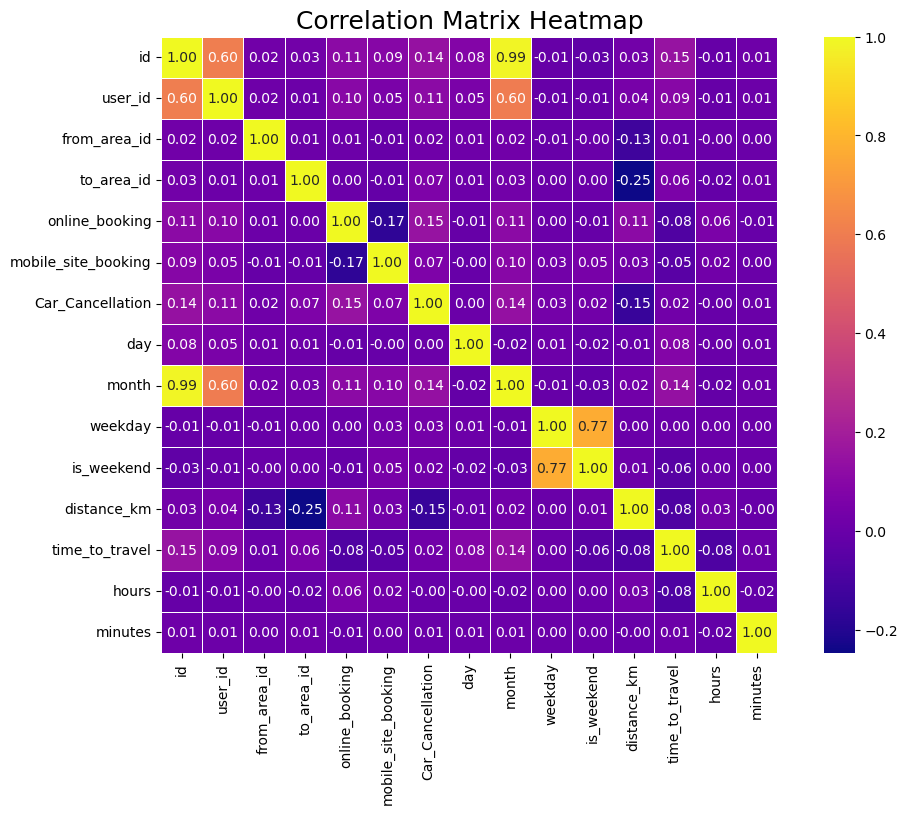

In [35]:
corr_matrix = df1.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt='.2f', linewidths=.5, square=True)
plt.title('Correlation Matrix Heatmap', fontsize=18)
plt.show()

In [36]:
df1.shape

(34292, 15)

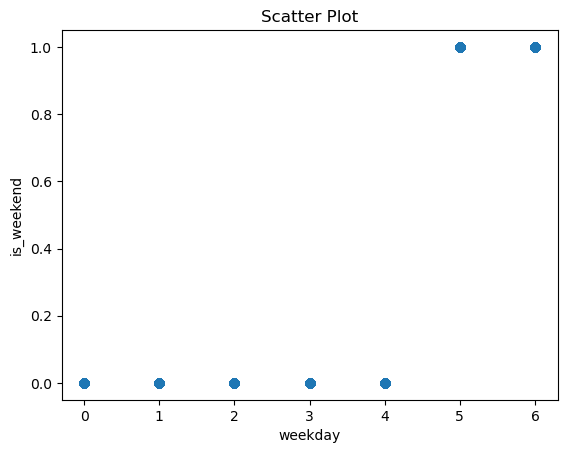

In [37]:
plt.scatter(df1['weekday'], df1['is_weekend'])
plt.xlabel('weekday')
plt.ylabel('is_weekend')
plt.title('Scatter Plot')
plt.show()

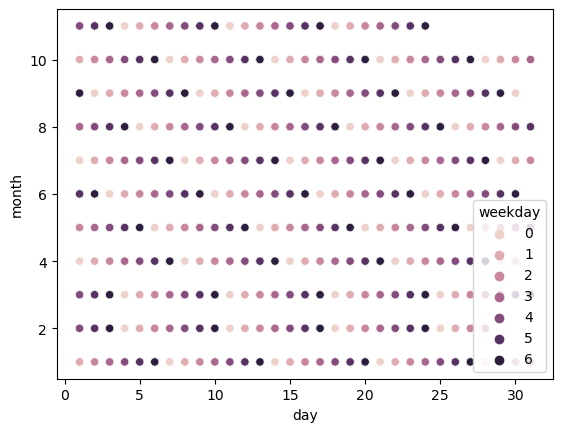

In [38]:
sns.scatterplot(x=df1['day'],y= df1['month'],hue=df1['weekday'])
plt.show()

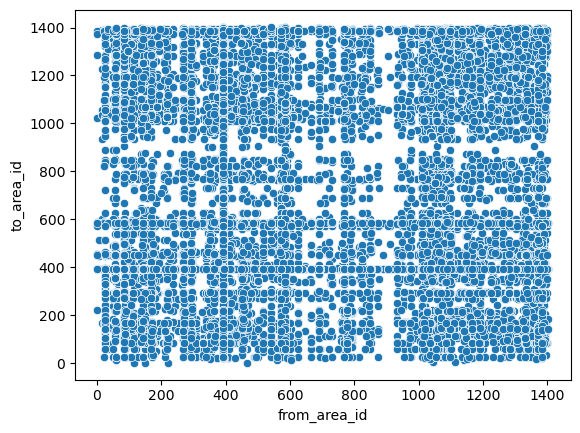

In [39]:
sns.scatterplot(x='from_area_id',y='to_area_id', data=df1)
plt.show()

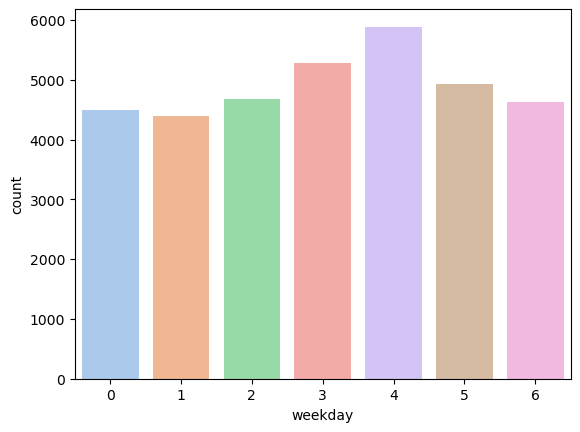

In [40]:
sns.countplot(x='weekday', data=df1, palette='pastel')
plt.show()

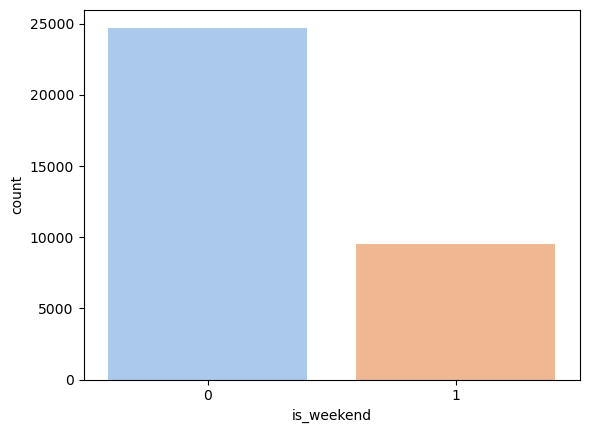

In [41]:
sns.countplot(x='is_weekend', data=df1, palette='pastel')
plt.show()

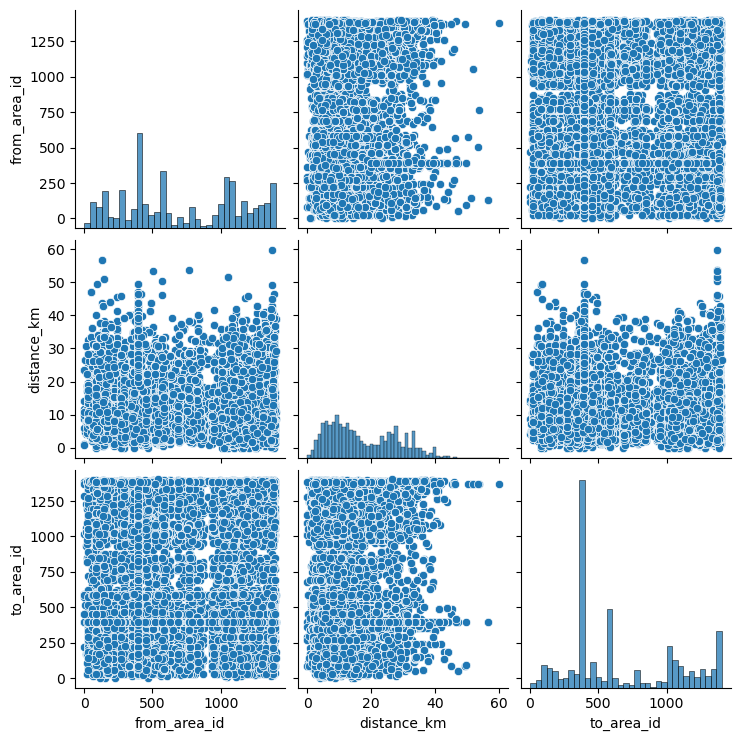

In [42]:
sns.pairplot(df1[['from_area_id', 'distance_km','to_area_id']])
plt.title('')
plt.show()

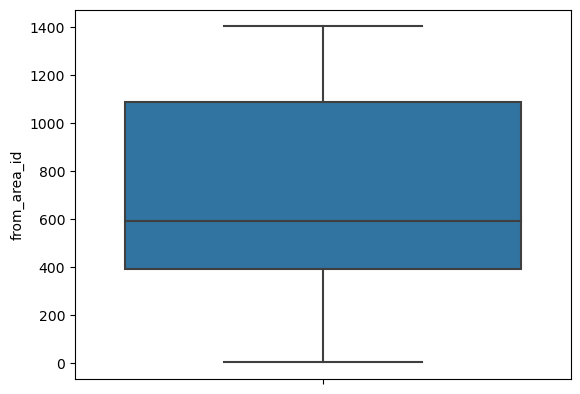

PathPatch6((-0.4, 393) ...)


In [43]:
a=sns.boxplot(y='from_area_id',data=df1)
plt.show()
for patch in a.patches:
    print(patch)
    

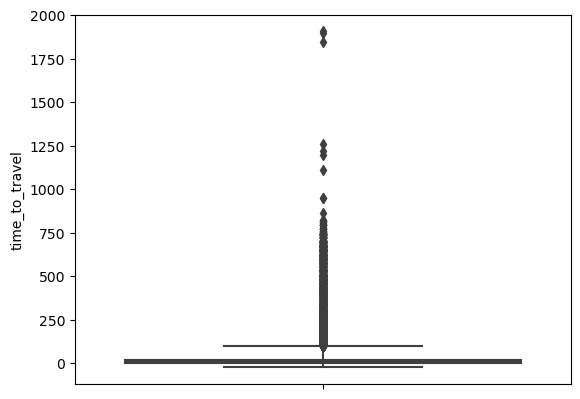

In [44]:
b=sns.boxplot(y='time_to_travel',data=df1,whis=5)
plt.show()


In [45]:
f1 = df1['time_to_travel'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr* 1.5)
df1['time_to_travel'].clip(lower=LB,upper=UB,inplace=True)

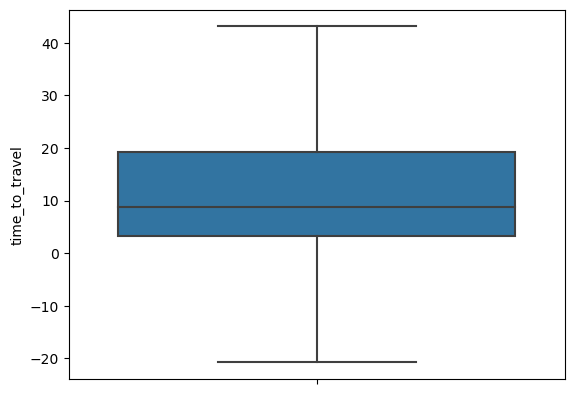

In [46]:
c=sns.boxplot(y='time_to_travel',data=df1,whis=7)
plt.show()

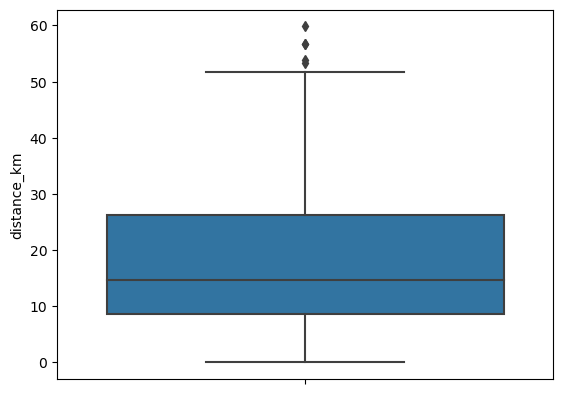

In [47]:
d=sns.boxplot(y='distance_km',data=df1)
plt.show()

In [48]:
f1t = df1['distance_km'].sort_values(ascending=True)
q1t = f1t.quantile(.25)
q3t = f1t.quantile(.75)
iqrt = q3t - q1t
UBt = q3t + (iqrt * 1.5)
LBt = q1t - (iqrt * 1.5)
df1['distance_km'].clip(lower=LBt,upper=UBt,inplace=True)

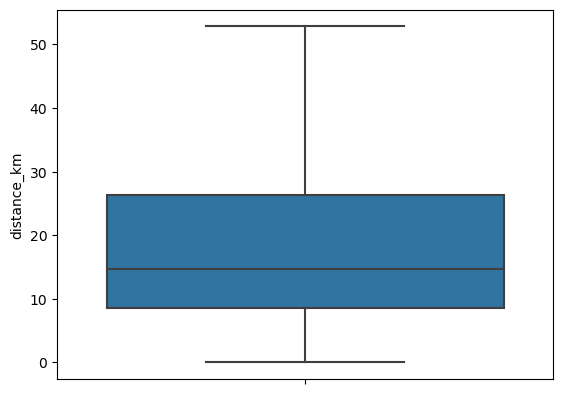

In [49]:
e=sns.boxplot(y='distance_km',data=df1)
plt.show()

In [50]:
#outlers are removed

In [51]:
counts = df1["Car_Cancellation"].value_counts()
counts

Car_Cancellation
0    31517
1     2775
Name: count, dtype: int64

In [52]:
#imbalanced data to balanced using oversampling

In [53]:
from scipy.stats import skew
target_column = df1['Car_Cancellation']
skewness = skew(target_column)
print(f"Skewness of the target column: {skewness}")

Skewness of the target column: 3.073357316967135


Text(0, 0.5, 'Frequency')

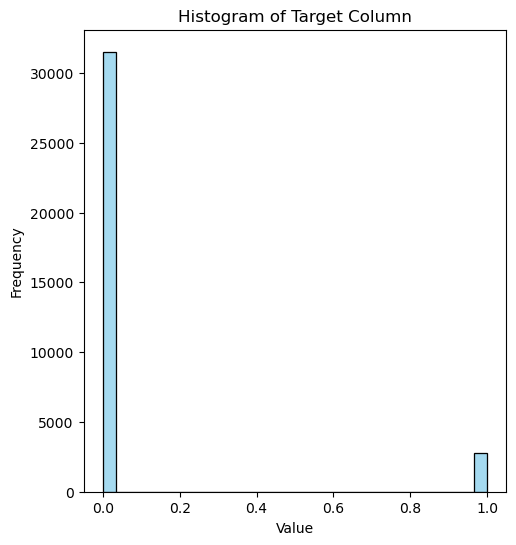

In [54]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(target_column, kde=False, bins=30, color='skyblue')
plt.title('Histogram of Target Column')
plt.xlabel('Value')
plt.ylabel('Frequency')

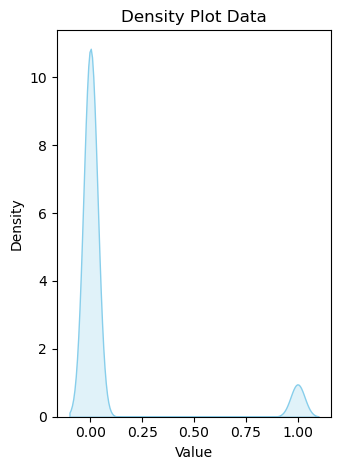

In [55]:
plt.subplot(1, 2, 2)
sns.kdeplot(df1['Car_Cancellation'], shade=True, color='skyblue')
plt.title('Density Plot Data')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [56]:
#since the data is highly positive skew 
from sklearn.model_selection import train_test_split

x = df1.drop('Car_Cancellation', axis=1)
y = df1['Car_Cancellation']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_trained, y_trained = smote.fit_resample(x_train, y_train)



#hence the new balanced data with x parameters is: x_trained, y_trained



In [59]:
print(x_train.shape,y_train.shape)
print(x_trained.shape,y_trained.shape)

(27433, 14) (27433,)
(50384, 14) (50384,)


In [60]:
#importing librabries for modelling and  prediction
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, classification_report, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [62]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_trained, y_trained)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7791223210380522
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      6325
           1       0.18      0.53      0.27       534

    accuracy                           0.78      6859
   macro avg       0.57      0.67      0.57      6859
weighted avg       0.89      0.78      0.82      6859

[[5061 1264]
 [ 251  283]]


In [65]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_trained, y_trained)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.767604607085581
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      6325
           1       0.18      0.57      0.28       534

    accuracy                           0.77      6859
   macro avg       0.57      0.68      0.57      6859
weighted avg       0.90      0.77      0.82      6859

[[4958 1367]
 [ 227  307]]


In [66]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_trained, y_trained)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8574136171453565
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      6325
           1       0.22      0.34      0.27       534

    accuracy                           0.86      6859
   macro avg       0.58      0.62      0.60      6859
weighted avg       0.89      0.86      0.87      6859

[[5700  625]
 [ 353  181]]


In [67]:
#naive bayes
nb_model = GaussianNB()
nb_model.fit(x_trained, y_trained)
y_pred = nb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)


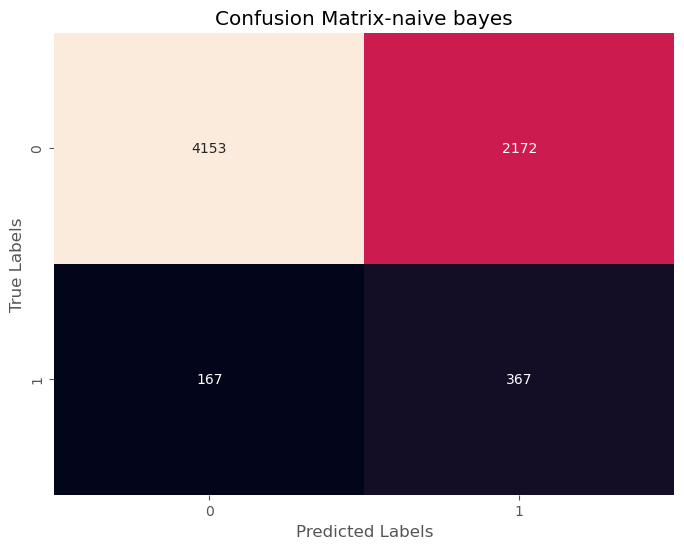

In [68]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',cbar=False)
plt.title('Confusion Matrix-naive bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [69]:
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6589881906983526
              precision    recall  f1-score   support

           0       0.96      0.66      0.78      6325
           1       0.14      0.69      0.24       534

    accuracy                           0.66      6859
   macro avg       0.55      0.67      0.51      6859
weighted avg       0.90      0.66      0.74      6859

[[4153 2172]
 [ 167  367]]


In [70]:
#LOGISTIC REGRESSION
logreg = LogisticRegression(random_state=42)
logreg.fit(x_trained, y_trained)
y_pred = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.6218107595859454
Precision:  0.13240542469664526
Recall:  0.6947565543071161
              precision    recall  f1-score   support

           0       0.96      0.62      0.75      6325
           1       0.13      0.69      0.22       534

    accuracy                           0.62      6859
   macro avg       0.55      0.66      0.49      6859
weighted avg       0.90      0.62      0.71      6859



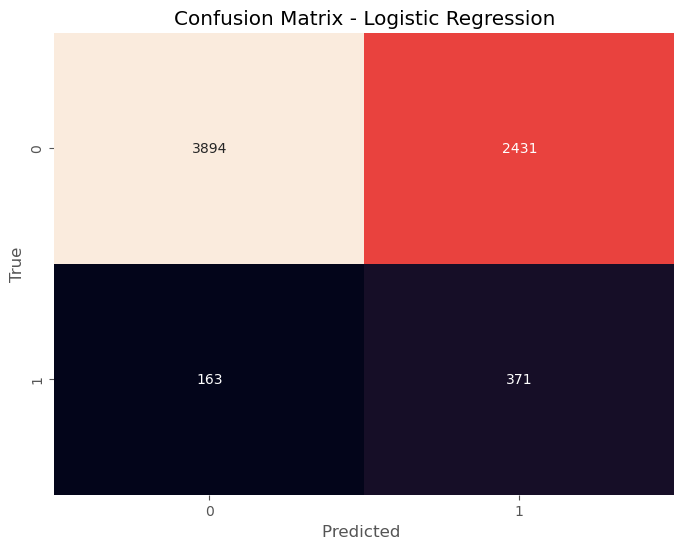

In [71]:
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)


plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted ')
plt.ylabel('True')


plt.show()

In [73]:
#DECISION TREE
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_trained, y_trained)
y_pred = dtree.predict(x_test)
y_prob = dtree.predict_proba(x_test)[:, 1] 
accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_prob)

In [74]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')


Accuracy: 0.8505613063128736
Precision: 0.2641690682036503
Recall: 0.5149812734082397
ROC AUC: 0.697760210803689


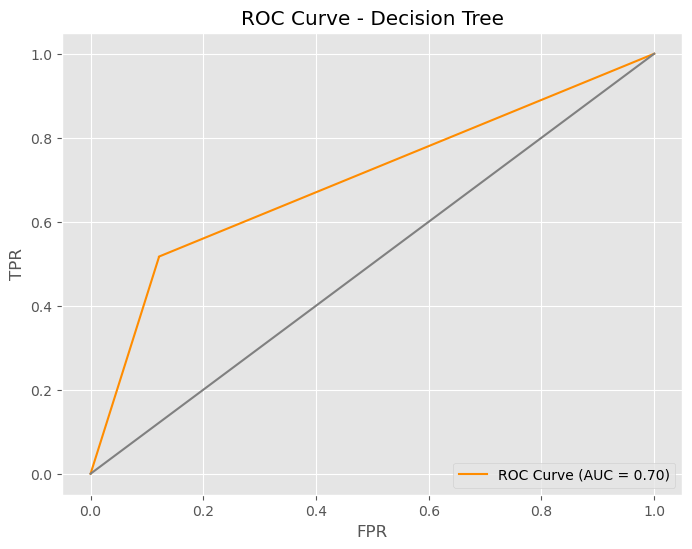

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

2nd dataset - df2

In [76]:
df2.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,132519,22172,12,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,132531,22189,24,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,132539,22192,54,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
158,132697,22275,28,NaN,1,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
216,132760,22310,87,NaN,1,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0


In [77]:
df2.nunique()

id                     1589
user_id                1413
vehicle_model_id         18
package_id                0
travel_type_id            1
from_area_id            297
to_area_id                1
from_city_id              3
to_city_id              116
from_date              1288
online_booking            2
mobile_site_booking       2
booking_created        1586
from_lat                249
from_long               249
to_lat                    1
to_long                   1
Car_Cancellation          2
dtype: int64

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1589 non-null   int64  
 1   user_id              1589 non-null   int64  
 2   vehicle_model_id     1589 non-null   int64  
 3   package_id           0 non-null      float64
 4   travel_type_id       1589 non-null   int64  
 5   from_area_id         1501 non-null   float64
 6   to_area_id           1 non-null      float64
 7   from_city_id         1393 non-null   float64
 8   to_city_id           1588 non-null   float64
 9   from_date            1589 non-null   object 
 10  online_booking       1589 non-null   int64  
 11  mobile_site_booking  1589 non-null   int64  
 12  booking_created      1589 non-null   object 
 13  from_lat             1496 non-null   float64
 14  from_long            1496 non-null   float64
 15  to_lat               1 non-null      float

In [79]:
df2.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,1589.000000,1589.000000,1589.000000,0.0,1589.0,1501.000000,1.0,1393.000000,1588.000000,1589.000000,1589.000000,1496.000000,1496.000000,1.000000,1.0000,1589.000000
mean,159756.612964,32321.789176,41.752675,NaN,1.0,655.097268,1080.0,14.003589,68.537783,0.427313,0.018880,12.998396,77.650680,12.957324,77.6446,0.013216
std,15425.405672,11305.760843,31.175903,NaN,0.0,401.030823,NaN,3.877523,49.880732,0.494844,0.136143,0.101514,0.056213,NaN,NaN,0.114234
min,132519.000000,24.000000,10.000000,NaN,1.0,2.000000,1080.0,1.000000,4.000000,0.000000,0.000000,12.780910,77.400913,12.957324,77.6446,0.000000
25%,146277.000000,26358.000000,12.000000,NaN,1.0,393.000000,1080.0,15.000000,32.000000,0.000000,0.000000,12.930220,77.609230,12.957324,77.6446,0.000000
50%,158708.000000,33417.000000,24.000000,NaN,1.0,571.000000,1080.0,15.000000,49.000000,0.000000,0.000000,12.969368,77.655300,12.957324,77.6446,0.000000
75%,174409.000000,41344.000000,65.000000,NaN,1.0,1063.000000,1080.0,15.000000,108.000000,1.000000,0.000000,13.018540,77.706880,12.957324,77.6446,0.000000
max,185916.000000,48714.000000,90.000000,NaN,1.0,1398.000000,1080.0,31.000000,203.000000,1.000000,1.000000,13.243730,77.786420,12.957324,77.6446,1.000000


In [80]:
df2.isnull().sum().div(df2.shape[0]).mul(100).sort_values(ascending = False)

package_id             100.000000
to_long                 99.937067
to_lat                  99.937067
to_area_id              99.937067
from_city_id            12.334802
from_long                5.852738
from_lat                 5.852738
from_area_id             5.538074
to_city_id               0.062933
id                       0.000000
booking_created          0.000000
from_date                0.000000
mobile_site_booking      0.000000
online_booking           0.000000
user_id                  0.000000
travel_type_id           0.000000
vehicle_model_id         0.000000
Car_Cancellation         0.000000
dtype: float64

In [81]:
df2.drop(columns = ["package_id","travel_type_id","to_area_id","to_lat","to_long"],axis=1,inplace= True)

In [82]:
df2.describe()

,id,user_id,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation
count,1589.000000,1589.000000,1589.000000,1501.000000,1393.000000,1588.000000,1589.000000,1589.000000,1496.000000,1496.000000,1589.000000
mean,159756.612964,32321.789176,41.752675,655.097268,14.003589,68.537783,0.427313,0.018880,12.998396,77.650680,0.013216
std,15425.405672,11305.760843,31.175903,401.030823,3.877523,49.880732,0.494844,0.136143,0.101514,0.056213,0.114234
min,132519.000000,24.000000,10.000000,2.000000,1.000000,4.000000,0.000000,0.000000,12.780910,77.400913,0.000000
25%,146277.000000,26358.000000,12.000000,393.000000,15.000000,32.000000,0.000000,0.000000,12.930220,77.609230,0.000000
50%,158708.000000,33417.000000,24.000000,571.000000,15.000000,49.000000,0.000000,0.000000,12.969368,77.655300,0.000000
75%,174409.000000,41344.000000,65.000000,1063.000000,15.000000,108.000000,1.000000,0.000000,13.018540,77.706880,0.000000
max,185916.000000,48714.000000,90.000000,1398.000000,31.000000,203.000000,1.000000,1.000000,13.243730,77.786420,1.000000


In [83]:
df2.shape

(1589, 13)

In [84]:
df2.describe(include="all")

,id,user_id,vehicle_model_id,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
count,1589.000000,1589.000000,1589.000000,1501.000000,1393.000000,1588.000000,1589,1589.000000,1589.000000,1589,1496.000000,1496.000000,1589.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,1288,NaN,NaN,1586,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,10-12-2013 06:00,NaN,NaN,4/26/2013 22:14,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,2,NaN,NaN,NaN
mean,159756.612964,32321.789176,41.752675,655.097268,14.003589,68.537783,NaN,0.427313,0.018880,NaN,12.998396,77.650680,0.013216
std,15425.405672,11305.760843,31.175903,401.030823,3.877523,49.880732,NaN,0.494844,0.136143,NaN,0.101514,0.056213,0.114234
min,132519.000000,24.000000,10.000000,2.000000,1.000000,4.000000,NaN,0.000000,0.000000,NaN,12.780910,77.400913,0.000000
25%,146277.000000,26358.000000,12.000000,393.000000,15.000000,32.000000,NaN,0.000000,0.000000,NaN,12.930220,77.609230,0.000000
50%,158708.000000,33417.000000,24.000000,571.000000,15.000000,49.000000,NaN,0.000000,0.000000,NaN,12.969368,77.655300,0.000000
75%,174409.000000,41344.000000,65.000000,1063.000000,15.000000,108.000000,NaN,1.000000,0.000000,NaN,13.018540,77.706880,0.000000


In [85]:
#as like before there are many null values
df2.fillna({'from_area_id': df2['from_area_id'].mean(),
              'from_city_id': df2['from_city_id'].mean(),
              'from_lat': df2['from_lat'].mean(),
              'from_long': df2['from_long'].mean(),
             'to_city_id':df2['to_city_id'].mean()},inplace=True
              )


In [86]:
df2.isnull().sum()

id                     0
user_id                0
vehicle_model_id       0
from_area_id           0
from_city_id           0
to_city_id             0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
Car_Cancellation       0
dtype: int64

In [87]:
df2['from_date'] = pd.to_datetime(df2['from_date'], format='mixed')                    
#df2['from_date'] = df2['from_date'].apply(parse_dates)
df2['day'] = df2['from_date'].dt.day
df2['month'] = df2['from_date'].dt.month
df2['weekday'] = df2['from_date'].dt.weekday
df2['time'] = df2['from_date'].dt.time
df2['is_weekend'] = df2['from_date'].dt.weekday >= 5
df2.head()

,id,user_id,vehicle_model_id,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,day,month,weekday,time,is_weekend
6,132519,22172,12,571.0,15.000000,108.0,2013-01-01 09:45:00,0,0,01-01-2013 09:21,12.951850,77.696420,0,1,1,1,09:45:00,False
17,132531,22189,24,1383.0,14.003589,32.0,2013-01-12 08:00:00,1,0,01-01-2013 12:17,12.930451,77.685822,0,12,1,5,08:00:00,True
24,132539,22192,54,515.0,15.000000,32.0,2013-01-05 08:30:00,0,0,01-01-2013 14:40,12.978960,77.673450,0,5,1,5,08:30:00,True
158,132697,22275,28,136.0,1.000000,152.0,2013-01-04 09:30:00,1,0,01-03-2013 12:19,12.907960,77.624180,0,4,1,4,09:30:00,False
216,132760,22310,87,1118.0,14.003589,32.0,2013-01-06 07:30:00,1,0,01-04-2013 09:32,12.930220,77.560390,0,6,1,6,07:30:00,True


In [88]:
df2['booking_created'] = pd.to_datetime(df2['booking_created'], format='mixed')                    
#df2['booking_created'] = df2['booking_created'].apply(parse_dates)
df2['day'] = df2['booking_created'].dt.day
df2['month'] = df2['booking_created'].dt.month
df2['weekday'] = df2['booking_created'].dt.weekday
df2['time'] = df2['booking_created'].dt.time
df2['is_weekend'] = df2['booking_created'].dt.weekday >= 5
df2.head(),

(         id  user_id  vehicle_model_id  from_area_id  from_city_id  \
 6    132519    22172                12         571.0     15.000000   
 17   132531    22189                24        1383.0     14.003589   
 24   132539    22192                54         515.0     15.000000   
 158  132697    22275                28         136.0      1.000000   
 216  132760    22310                87        1118.0     14.003589   
 
      to_city_id           from_date  online_booking  mobile_site_booking  \
 6         108.0 2013-01-01 09:45:00               0                    0   
 17         32.0 2013-01-12 08:00:00               1                    0   
 24         32.0 2013-01-05 08:30:00               0                    0   
 158       152.0 2013-01-04 09:30:00               1                    0   
 216        32.0 2013-01-06 07:30:00               1                    0   
 
         booking_created   from_lat  from_long  Car_Cancellation  day  month  \
 6   2013-01-01 09:21:00  12

In [89]:
df2['time_to_travel'] = (df2['from_date'] - df2['booking_created']).dt.total_seconds() / 3600


df2.head()

,id,user_id,vehicle_model_id,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,day,month,weekday,time,is_weekend,time_to_travel
6,132519,22172,12,571.0,15.000000,108.0,2013-01-01 09:45:00,0,0,2013-01-01 09:21:00,12.951850,77.696420,0,1,1,1,09:21:00,False,0.400000
17,132531,22189,24,1383.0,14.003589,32.0,2013-01-12 08:00:00,1,0,2013-01-01 12:17:00,12.930451,77.685822,0,1,1,1,12:17:00,False,259.716667
24,132539,22192,54,515.0,15.000000,32.0,2013-01-05 08:30:00,0,0,2013-01-01 14:40:00,12.978960,77.673450,0,1,1,1,14:40:00,False,89.833333
158,132697,22275,28,136.0,1.000000,152.0,2013-01-04 09:30:00,1,0,2013-01-03 12:19:00,12.907960,77.624180,0,3,1,3,12:19:00,False,21.183333
216,132760,22310,87,1118.0,14.003589,32.0,2013-01-06 07:30:00,1,0,2013-01-04 09:32:00,12.930220,77.560390,0,4,1,4,09:32:00,False,45.966667


In [90]:
del df2["from_date"]
del df2["booking_created"]
df2.head()

,id,user_id,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,time,is_weekend,time_to_travel
6,132519,22172,12,571.0,15.000000,108.0,0,0,12.951850,77.696420,0,1,1,1,09:21:00,False,0.400000
17,132531,22189,24,1383.0,14.003589,32.0,1,0,12.930451,77.685822,0,1,1,1,12:17:00,False,259.716667
24,132539,22192,54,515.0,15.000000,32.0,0,0,12.978960,77.673450,0,1,1,1,14:40:00,False,89.833333
158,132697,22275,28,136.0,1.000000,152.0,1,0,12.907960,77.624180,0,3,1,3,12:19:00,False,21.183333
216,132760,22310,87,1118.0,14.003589,32.0,1,0,12.930220,77.560390,0,4,1,4,09:32:00,False,45.966667


In [91]:
df2['time'] = df2['time'].astype(str)

df2[['hours', 'minutes', 'seconds']] = df2['time'].str.split(':', expand=True)

df2[['hours', 'minutes', 'seconds']] = df2[['hours', 'minutes', 'seconds']].astype(int)

del df2['time']
del df2['seconds']

df2


,id,user_id,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,time_to_travel,hours,minutes
6,132519,22172,12,571.0,15.000000,108.0,0,0,12.951850,77.696420,0,1,1,1,False,0.400000,9,21
17,132531,22189,24,1383.0,14.003589,32.0,1,0,12.930451,77.685822,0,1,1,1,False,259.716667,12,17
24,132539,22192,54,515.0,15.000000,32.0,0,0,12.978960,77.673450,0,1,1,1,False,89.833333,14,40
158,132697,22275,28,136.0,1.000000,152.0,1,0,12.907960,77.624180,0,3,1,3,False,21.183333,12,19
216,132760,22310,87,1118.0,14.003589,32.0,1,0,12.930220,77.560390,0,4,1,4,False,45.966667,9,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43342,185843,48667,12,393.0,15.000000,191.0,1,0,13.199560,77.706880,0,23,11,5,True,4.100000,17,54
43385,185889,48697,87,119.0,15.000000,146.0,1,0,13.047580,77.591840,0,23,11,5,True,134.600000,23,24
43386,185891,48699,12,1281.0,15.000000,32.0,1,0,12.934634,77.611283,0,23,11,5,True,7.766667,23,44
43393,185899,48704,12,393.0,15.000000,116.0,0,0,13.199560,77.706880,0,24,11,6,True,3.266667,7,14


In [92]:
df2.drop(columns = ["id","user_id"],inplace =True)

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['is_weekend'] = le.fit_transform(df2['is_weekend'])

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     1589 non-null   int64  
 1   from_area_id         1589 non-null   float64
 2   from_city_id         1589 non-null   float64
 3   to_city_id           1589 non-null   float64
 4   online_booking       1589 non-null   int64  
 5   mobile_site_booking  1589 non-null   int64  
 6   from_lat             1589 non-null   float64
 7   from_long            1589 non-null   float64
 8   Car_Cancellation     1589 non-null   int64  
 9   day                  1589 non-null   int32  
 10  month                1589 non-null   int32  
 11  weekday              1589 non-null   int32  
 12  is_weekend           1589 non-null   int64  
 13  time_to_travel       1589 non-null   float64
 14  hours                1589 non-null   int32  
 15  minutes              1589 non-null   int32

In [95]:
df2.corr()

,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,time_to_travel,hours,minutes
vehicle_model_id,1.000000,-0.011704,-0.018563,0.001020,0.021182,0.031813,-0.038067,-0.025490,0.016302,-0.009931,0.075429,-0.017503,-0.054374,0.116765,-0.007526,-0.018150
from_area_id,-0.011704,1.000000,0.032612,0.013481,0.006884,-0.052322,-0.201327,-0.137759,-0.002841,0.001533,0.016371,0.015505,0.017557,-0.073999,0.016740,-0.010965
from_city_id,-0.018563,0.032612,1.000000,0.000157,-0.325210,0.001160,-0.072148,-0.003392,0.025721,-0.024452,0.225300,0.022529,0.039721,-0.103081,0.024248,-0.021416
to_city_id,0.001020,0.013481,0.000157,1.000000,-0.031751,0.050449,-0.039739,-0.006664,-0.007881,0.013557,-0.027686,0.001024,-0.002242,-0.022528,-0.067869,0.020718
online_booking,0.021182,0.006884,-0.325210,-0.031751,1.000000,-0.119826,0.091897,0.042123,0.122835,0.037177,0.099135,-0.052892,-0.065841,0.119247,0.066250,0.023540
mobile_site_booking,0.031813,-0.052322,0.001160,0.050449,-0.119826,1.000000,0.050743,0.001204,-0.016054,-0.025637,0.067699,0.029591,0.038803,-0.004285,-0.013822,-0.017290
from_lat,-0.038067,-0.201327,-0.072148,-0.039739,0.091897,0.050743,1.000000,0.395173,-0.031411,0.053498,-0.002519,-0.107584,-0.048716,0.191400,-0.055505,0.013674
from_long,-0.025490,-0.137759,-0.003392,-0.006664,0.042123,0.001204,0.395173,1.000000,0.035154,0.001382,0.028108,-0.027807,-0.050736,0.086611,-0.008191,0.007127
Car_Cancellation,0.016302,-0.002841,0.025721,-0.007881,0.122835,-0.016054,-0.031411,0.035154,1.000000,-0.006446,0.095794,0.063210,0.079070,-0.008421,0.007752,0.024831
day,-0.009931,0.001533,-0.024452,0.013557,0.037177,-0.025637,0.053498,0.001382,-0.006446,1.000000,-0.146864,-0.025534,-0.029498,0.000216,-0.014767,-0.023022


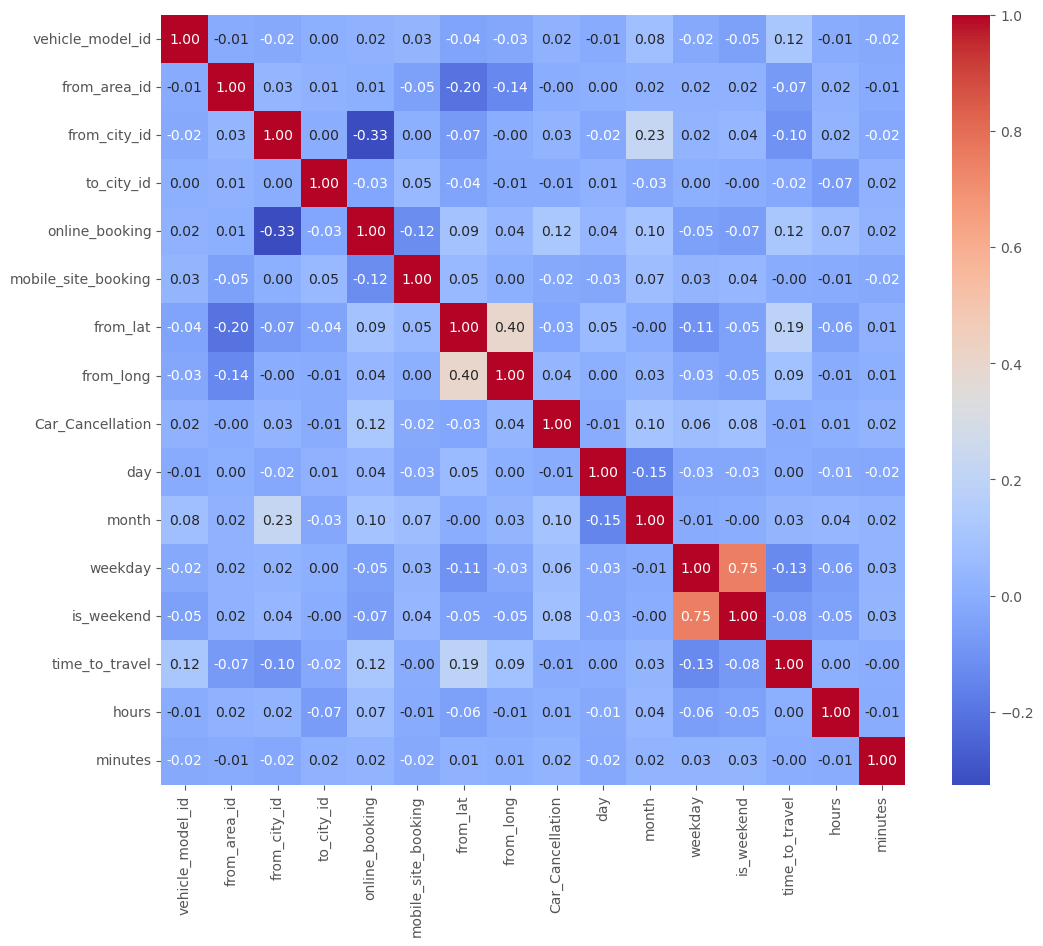

In [96]:
plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

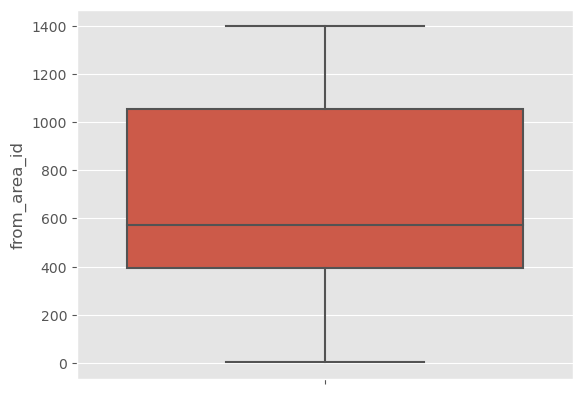

In [98]:
ax=sns.boxplot(y='from_area_id',data=df2)
plt.show()


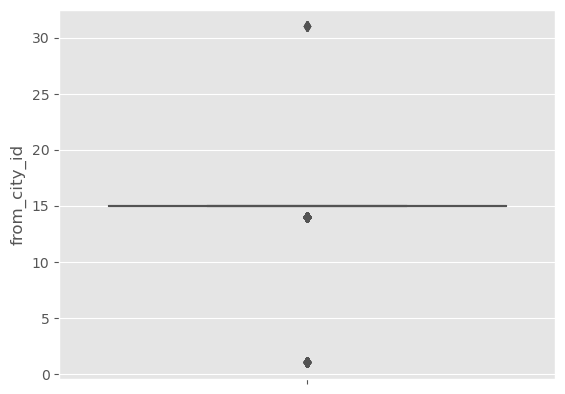

In [99]:
ax=sns.boxplot(y='from_city_id',data=df2)
plt.show()


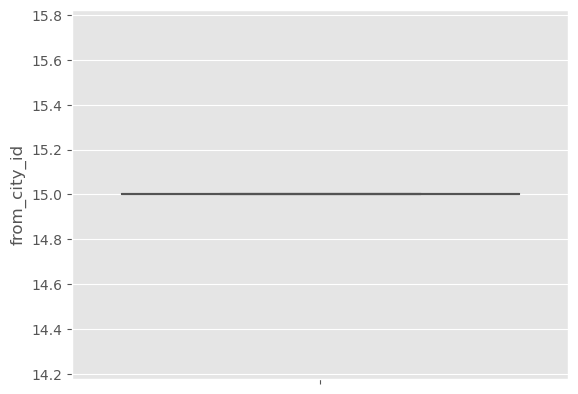

In [100]:
f1 = df2['from_city_id'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr * 1.5)
df2['from_city_id'].clip(lower=LB,upper=UB,inplace=True)
ax=sns.boxplot(y='from_city_id',data=df2)
plt.show()


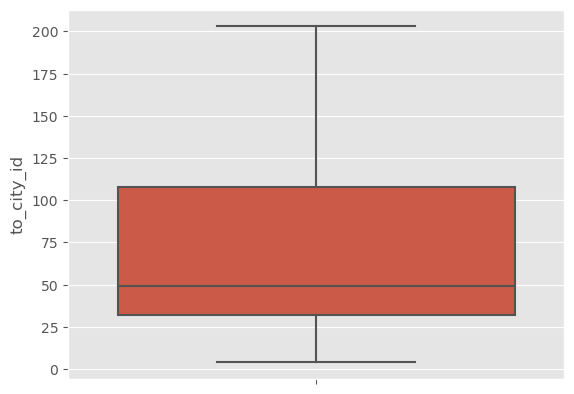

In [101]:
ax=sns.boxplot(y='to_city_id',data=df2)
plt.show()

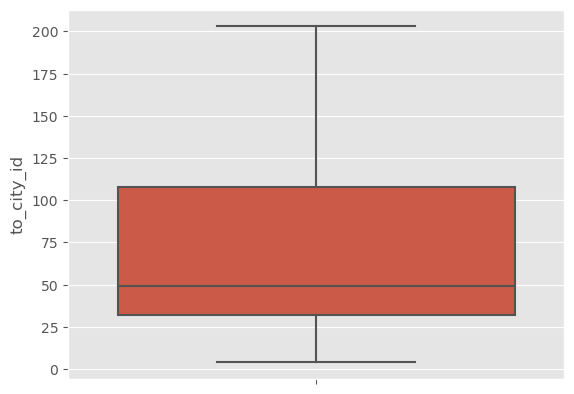

In [102]:
ax=sns.boxplot(y='to_city_id',data=df2)
plt.show()

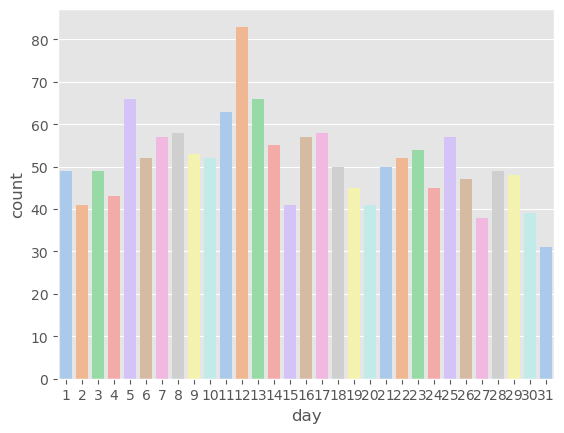

In [103]:
sns.countplot(x='day', data=df2, palette='pastel')
plt.show()

In [104]:
df2

,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,time_to_travel,hours,minutes
6,12,571.0,15.0,108.0,0,0,12.951850,77.696420,0,1,1,1,0,0.400000,9,21
17,24,1383.0,15.0,32.0,1,0,12.930451,77.685822,0,1,1,1,0,259.716667,12,17
24,54,515.0,15.0,32.0,0,0,12.978960,77.673450,0,1,1,1,0,89.833333,14,40
158,28,136.0,15.0,152.0,1,0,12.907960,77.624180,0,3,1,3,0,21.183333,12,19
216,87,1118.0,15.0,32.0,1,0,12.930220,77.560390,0,4,1,4,0,45.966667,9,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43342,12,393.0,15.0,191.0,1,0,13.199560,77.706880,0,23,11,5,1,4.100000,17,54
43385,87,119.0,15.0,146.0,1,0,13.047580,77.591840,0,23,11,5,1,134.600000,23,24
43386,12,1281.0,15.0,32.0,1,0,12.934634,77.611283,0,23,11,5,1,7.766667,23,44
43393,12,393.0,15.0,116.0,0,0,13.199560,77.706880,0,24,11,6,1,3.266667,7,14


In [106]:
from sklearn.utils import resample
df2_majority = df2[df2['Car_Cancellation'] == 0]
df2_minority = df2[df2['Car_Cancellation'] == 1]


df2_minority = resample(df2_minority, 
                                 replace=True, 
                                 n_samples=len(df2_majority), 
                                 random_state=42)


df2 = pd.concat([df2_majority, df2_minority])
df2

,vehicle_model_id,from_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,time_to_travel,hours,minutes
6,12,571.000000,15.0,108.0,0,0,12.951850,77.696420,0,1,1,1,0,0.400000,9,21
17,24,1383.000000,15.0,32.0,1,0,12.930451,77.685822,0,1,1,1,0,259.716667,12,17
24,54,515.000000,15.0,32.0,0,0,12.978960,77.673450,0,1,1,1,0,89.833333,14,40
158,28,136.000000,15.0,152.0,1,0,12.907960,77.624180,0,3,1,3,0,21.183333,12,19
216,87,1118.000000,15.0,32.0,1,0,12.930220,77.560390,0,4,1,4,0,45.966667,9,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32085,65,1150.000000,15.0,51.0,1,0,12.992870,77.716620,1,6,9,4,0,5.033333,16,28
15035,65,220.000000,15.0,56.0,1,0,12.997220,77.620030,1,25,5,5,1,4.983333,0,31
10160,24,393.000000,15.0,29.0,1,0,13.199560,77.706880,1,16,4,1,0,617.650000,14,51
33717,13,655.097268,15.0,69.0,1,0,12.998396,77.650680,1,16,9,0,0,3.183333,19,4


In [107]:
#decision tree
x = df2.drop(columns=['Car_Cancellation'])
y = df2['Car_Cancellation']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
print(x_train.dtypes)

vehicle_model_id         int64
from_area_id           float64
from_city_id           float64
to_city_id             float64
online_booking           int64
mobile_site_booking      int64
from_lat               float64
from_long              float64
day                      int32
month                    int32
weekday                  int32
is_weekend               int64
time_to_travel         float64
hours                    int32
minutes                  int32
dtype: object


In [108]:
model_dt = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt.fit(x_train,y_train)

model_dt_score_train = model_dt.score(x_train,y_train)

model_dt_score_test = model_dt.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

Training Score 0.9812599681020734
Testing Score 0.9713375796178344


In [110]:
model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=5, criterion='entropy')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

Training Score 0.919457735247209
Testing Score 0.9219745222929936


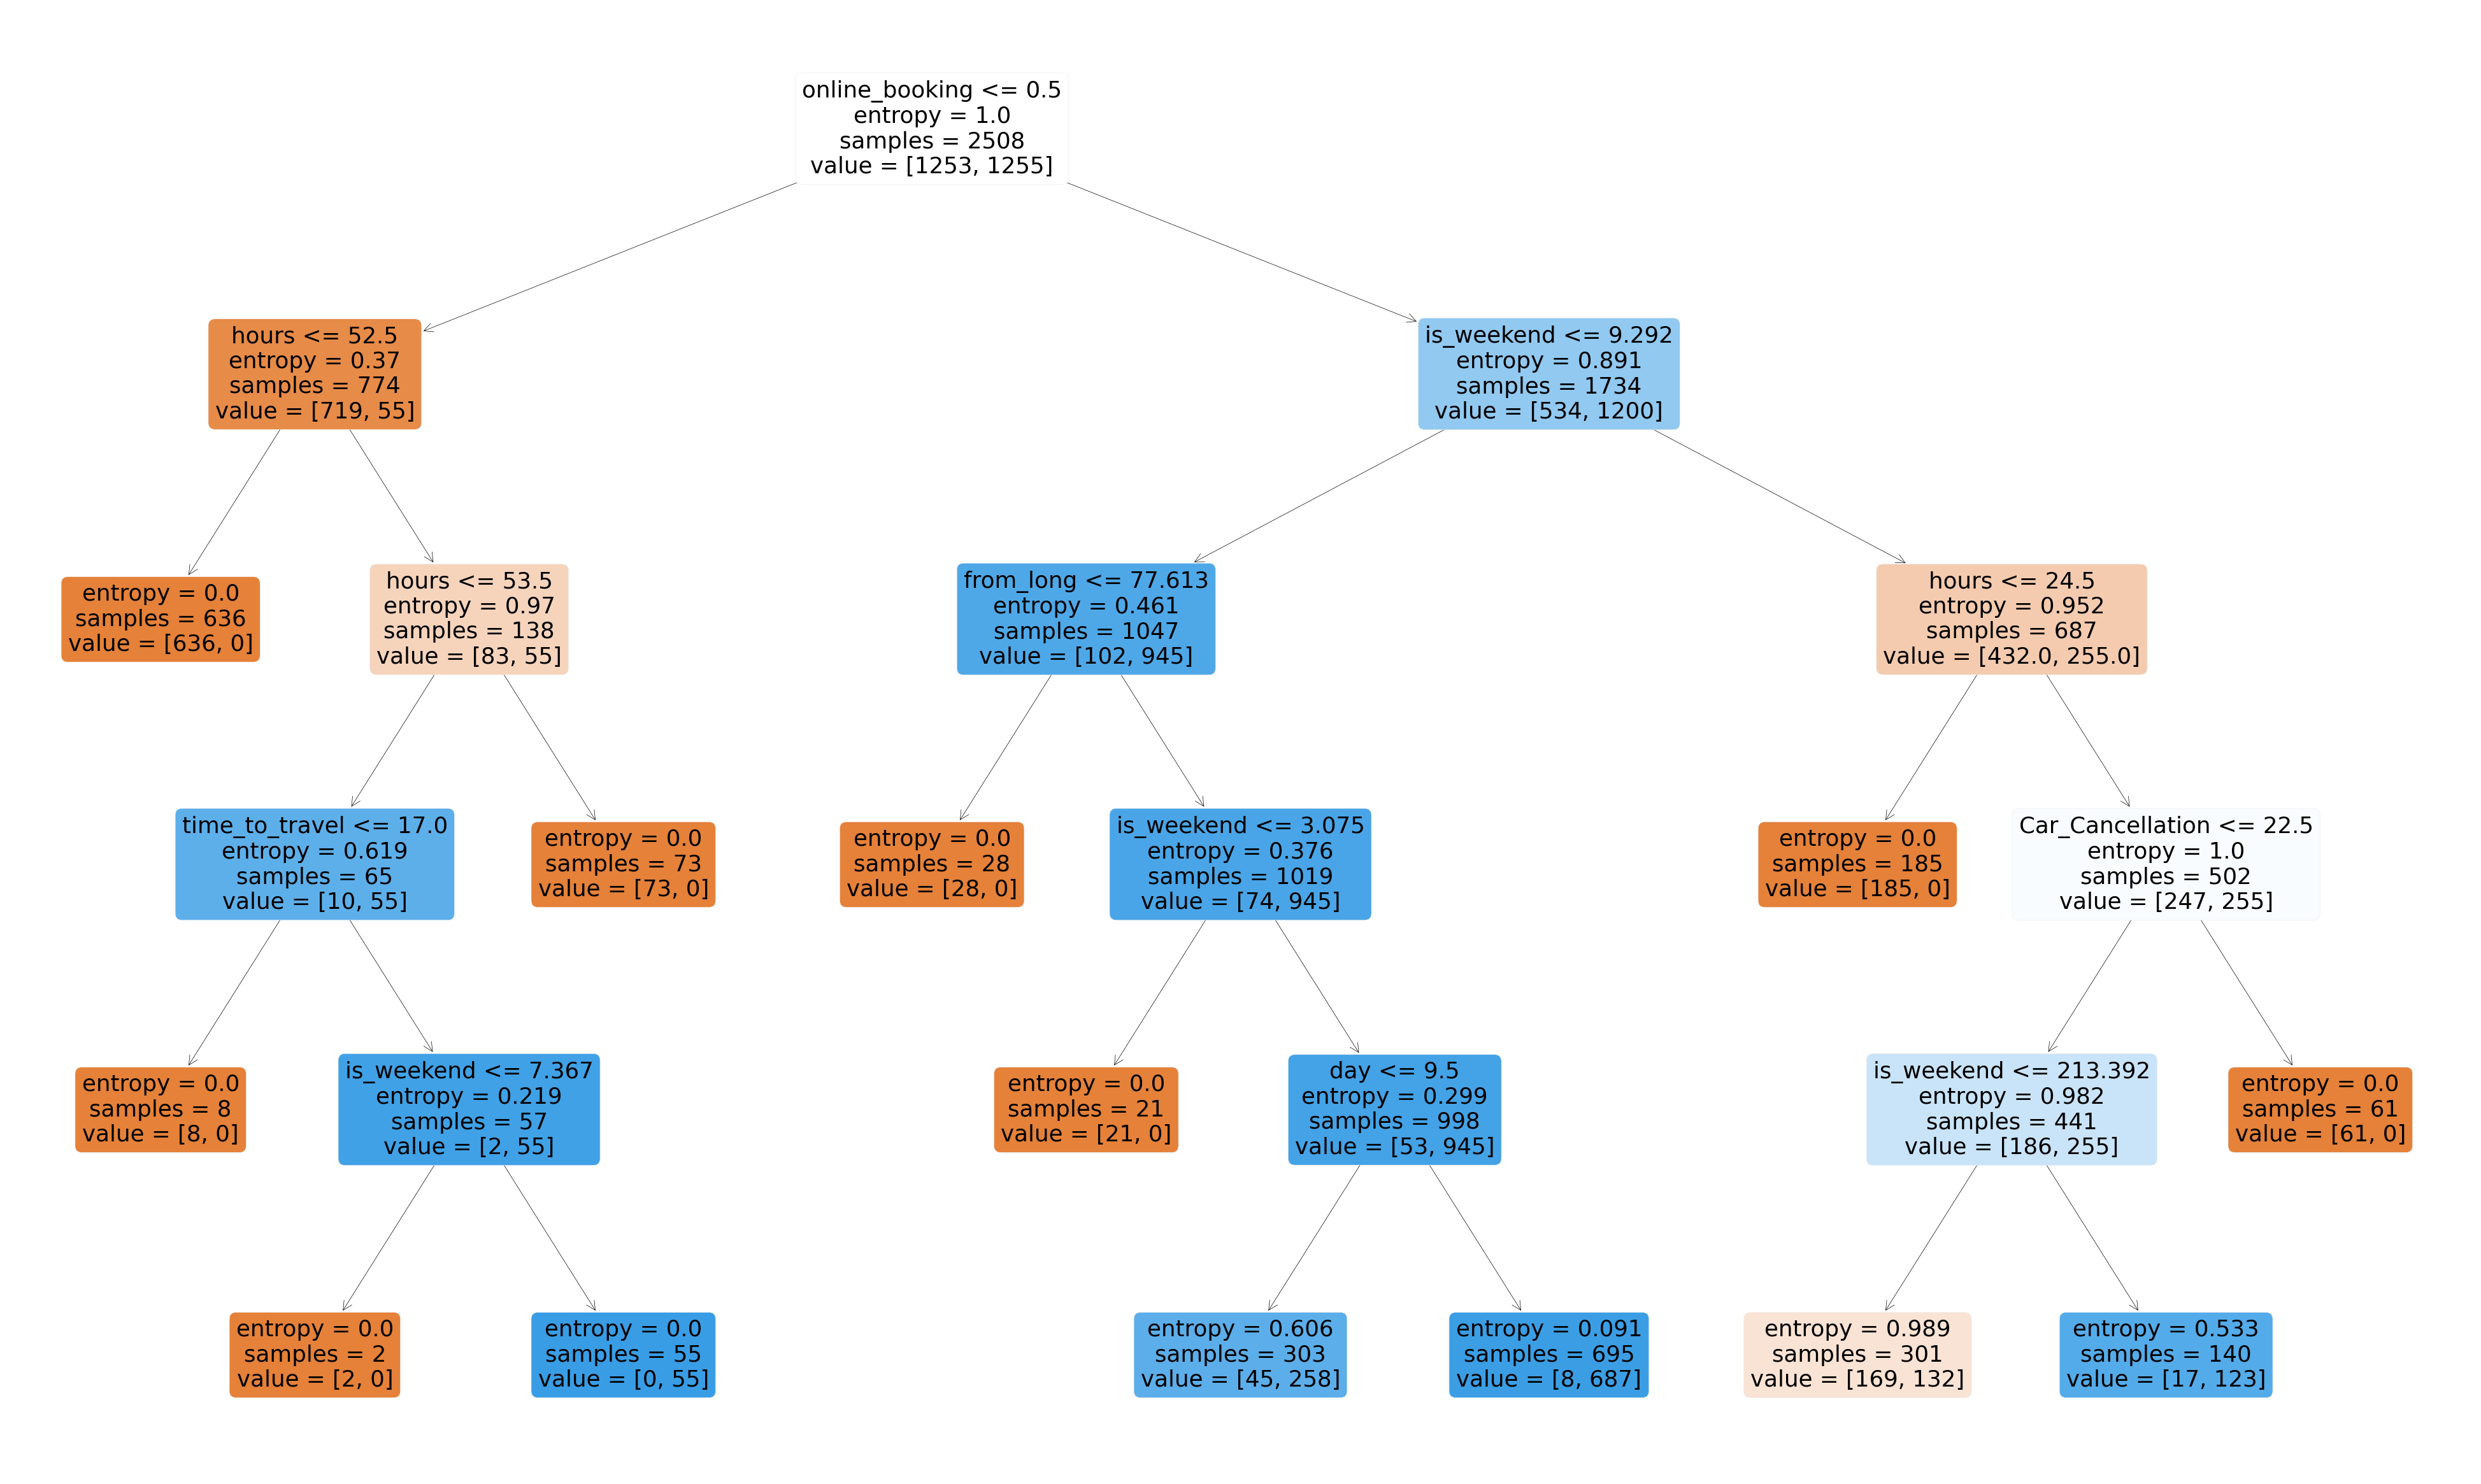

In [111]:
plt.figure(figsize=(50,30))  # Adjust size for better readability
plot_tree(model_dt_, feature_names=df2.columns,filled=True, rounded=True)
plt.show()

In [112]:
y_pred_dt = model_dt_.predict_proba(x_test)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)

In [114]:
predictions = model_dt_.predict(x_test)
print(confusion_matrix(y_test,predictions))

[[297  18]
 [ 31 282]]


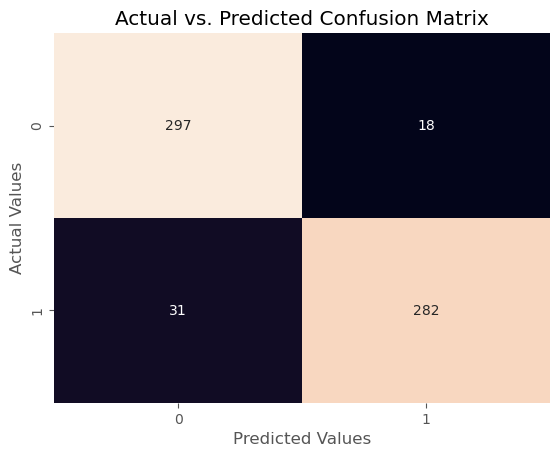

In [115]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()



In [116]:
accuracy_score(y_test,predictions)

0.9219745222929936

In [117]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[305  10]
 [  0 313]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       315
           1       0.97      1.00      0.98       313

    accuracy                           0.98       628
   macro avg       0.98      0.98      0.98       628
weighted avg       0.98      0.98      0.98       628



In [119]:
accuracy_rate = []
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,df2['Car_Cancellation'],cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())
    

Text(0, 0.5, 'Accuracy Rate')

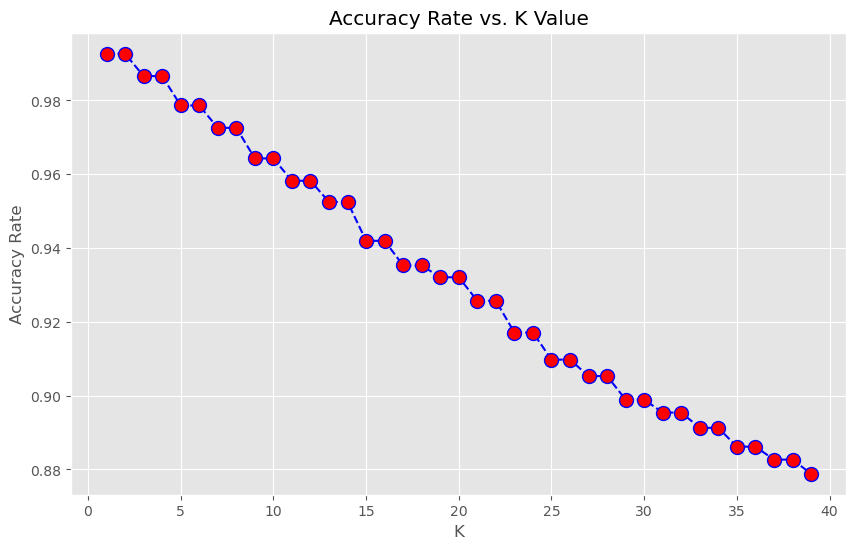

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [122]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Accuracy: 0.8505613063128736
[[303  12]
 [  0 313]]


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       315
           1       0.96      1.00      0.98       313

    accuracy                           0.98       628
   macro avg       0.98      0.98      0.98       628
weighted avg       0.98      0.98      0.98       628



In [123]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Accuracy: 0.8505613063128736
[[310   5]
 [  0 313]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       315
           1       0.98      1.00      0.99       313

    accuracy                           0.99       628
   macro avg       0.99      0.99      0.99       628
weighted avg       0.99      0.99      0.99       628



In [124]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

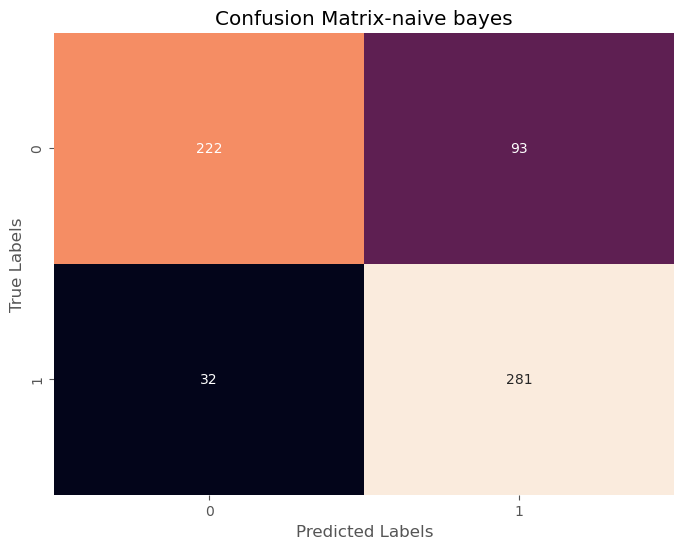

In [125]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',cbar=False)
plt.title('Confusion Matrix-naive bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [126]:
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8009554140127388
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       315
           1       0.75      0.90      0.82       313

    accuracy                           0.80       628
   macro avg       0.81      0.80      0.80       628
weighted avg       0.81      0.80      0.80       628

[[222  93]
 [ 32 281]]


In [127]:
#LOGISTIC REGRESSION
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8009554140127388
Precision:  0.7670454545454546
Recall:  0.8626198083067093
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       315
           1       0.77      0.86      0.81       313

    accuracy                           0.80       628
   macro avg       0.81      0.80      0.80       628
weighted avg       0.81      0.80      0.80       628



3rd dataset = df3

In [128]:
df3.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,132521,22182,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,132535,22190,87,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,132538,21995,12,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,132552,22201,12,1.0,3,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,132569,15846,12,2.0,3,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0


In [129]:
df3.drop(columns=["id","user_id"],axis=1,inplace = True)


In [130]:
df3.head()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,65,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,87,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,12,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,12,1.0,3,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,12,2.0,3,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0


In [131]:
df3.shape

(7550, 16)

In [132]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7550 entries, 8 to 43428
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vehicle_model_id     7550 non-null   int64  
 1   package_id           7550 non-null   float64
 2   travel_type_id       7550 non-null   int64  
 3   from_area_id         7550 non-null   float64
 4   to_area_id           0 non-null      float64
 5   from_city_id         448 non-null    float64
 6   to_city_id           0 non-null      float64
 7   from_date            7550 non-null   object 
 8   online_booking       7550 non-null   int64  
 9   mobile_site_booking  7550 non-null   int64  
 10  booking_created      7550 non-null   object 
 11  from_lat             7550 non-null   float64
 12  from_long            7550 non-null   float64
 13  to_lat               0 non-null      float64
 14  to_long              0 non-null      float64
 15  Car_Cancellation     7550 non-null   int64

In [133]:
df3.describe()

,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation
count,7550.000000,7550.000000,7550.0,7550.000000,0.0,448.0,0.0,7550.000000,7550.000000,7550.000000,7550.000000,0.0,0.0,7550.000000
mean,26.761589,2.030066,3.0,728.874040,NaN,15.0,NaN,0.283576,0.026358,12.965152,77.635600,NaN,NaN,0.044503
std,27.147129,1.461756,0.0,423.493248,NaN,0.0,NaN,0.450763,0.160207,0.069990,0.057509,NaN,NaN,0.206224
min,10.000000,1.000000,3.0,2.000000,NaN,15.0,NaN,0.000000,0.000000,12.776630,77.388450,NaN,NaN,0.000000
25%,12.000000,1.000000,3.0,363.000000,NaN,15.0,NaN,0.000000,0.000000,12.920890,77.597766,NaN,NaN,0.000000
50%,12.000000,2.000000,3.0,693.000000,NaN,15.0,NaN,0.000000,0.000000,12.962980,77.633540,NaN,NaN,0.000000
75%,24.000000,2.000000,3.0,1095.000000,NaN,15.0,NaN,1.000000,0.000000,12.993190,77.677925,NaN,NaN,0.000000
max,90.000000,7.000000,3.0,1401.000000,NaN,15.0,NaN,1.000000,1.000000,13.243730,77.786420,NaN,NaN,1.000000


In [137]:
df3.isnull().sum().div(df3.shape[0]).mul(100).sort_values(ascending=False)

to_area_id             100.000000
to_city_id             100.000000
to_lat                 100.000000
to_long                100.000000
from_city_id            94.066225
vehicle_model_id         0.000000
package_id               0.000000
travel_type_id           0.000000
from_area_id             0.000000
from_date                0.000000
online_booking           0.000000
mobile_site_booking      0.000000
booking_created          0.000000
from_lat                 0.000000
from_long                0.000000
Car_Cancellation         0.000000
dtype: float64

In [138]:
df3.drop(columns=["to_area_id","to_city_id","to_lat","to_long","from_city_id"],axis=1,inplace = True)

In [139]:
df3.shape

(7550, 11)

In [140]:
df3['from_date'] = pd.to_datetime(df3['from_date'], format='mixed')
df3['day'] = df3['from_date'].dt.day
df3['month'] = df3['from_date'].dt.month
df3['weekday'] = df3['from_date'].dt.weekday
df3['time'] = df3['from_date'].dt.time
df3['is_weekend'] = df3['from_date'].dt.weekday >= 5

df3['booking_created'] = pd.to_datetime(df3['booking_created'], format='mixed')
df3['day'] = df3['booking_created'].dt.day
df3['month'] = df3['booking_created'].dt.month
df3['weekday'] = df3['booking_created'].dt.weekday
df3['time'] = df3['booking_created'].dt.time
df3['is_weekend'] = df3['booking_created'].dt.weekday >= 5

df3

,vehicle_model_id,package_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,day,month,weekday,time,is_weekend
8,65,2.0,3,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,12.927320,77.635750,0,1,1,1,09:44:00,False
20,87,2.0,3,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,13.018540,77.635240,0,1,1,1,12:52:00,False
23,12,1.0,3,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,12.973448,77.620320,0,1,1,1,14:39:00,False
34,12,1.0,3,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,12.869805,77.653211,0,1,1,1,17:25:00,False
47,12,2.0,3,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,12.912810,77.609230,0,1,1,1,19:37:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415,12,1.0,3,768.0,2013-11-24 16:00:00,0,1,2013-11-24 12:32:00,12.989990,77.553320,0,24,11,6,12:32:00,True
43417,12,4.0,3,1390.0,2013-11-24 15:00:00,0,0,2013-11-24 13:06:00,12.969368,77.641302,0,24,11,6,13:06:00,True
43420,65,2.0,3,1237.0,2013-11-25 01:00:00,1,0,2013-11-24 13:54:00,12.926450,77.612060,0,24,11,6,13:54:00,True
43424,12,2.0,3,515.0,2013-11-24 15:15:00,0,0,2013-11-24 14:23:00,12.978960,77.673450,0,24,11,6,14:23:00,True


In [141]:
df3['time'] = df3['time'].astype(str)

df3[['hours', 'minutes', 'seconds']] = df3['time'].str.split(':', expand=True)

df3[['hours', 'minutes', 'seconds']] = df3[['hours', 'minutes', 'seconds']].astype(int)

del df3['time']
del df3['seconds']

df3

,vehicle_model_id,package_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes
8,65,2.0,3,448.0,2013-01-01 16:00:00,0,0,2013-01-01 09:44:00,12.927320,77.635750,0,1,1,1,False,9,44
20,87,2.0,3,471.0,2013-01-01 14:30:00,0,0,2013-01-01 12:52:00,13.018540,77.635240,0,1,1,1,False,12,52
23,12,1.0,3,1286.0,2013-01-01 16:30:00,0,0,2013-01-01 14:39:00,12.973448,77.620320,0,1,1,1,False,14,39
34,12,1.0,3,1323.0,2013-01-01 20:00:00,1,0,2013-01-01 17:25:00,12.869805,77.653211,0,1,1,1,False,17,25
47,12,2.0,3,142.0,2013-01-02 03:00:00,0,0,2013-01-01 19:37:00,12.912810,77.609230,0,1,1,1,False,19,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415,12,1.0,3,768.0,2013-11-24 16:00:00,0,1,2013-11-24 12:32:00,12.989990,77.553320,0,24,11,6,True,12,32
43417,12,4.0,3,1390.0,2013-11-24 15:00:00,0,0,2013-11-24 13:06:00,12.969368,77.641302,0,24,11,6,True,13,6
43420,65,2.0,3,1237.0,2013-11-25 01:00:00,1,0,2013-11-24 13:54:00,12.926450,77.612060,0,24,11,6,True,13,54
43424,12,2.0,3,515.0,2013-11-24 15:15:00,0,0,2013-11-24 14:23:00,12.978960,77.673450,0,24,11,6,True,14,23


In [142]:
df3['time_to_travel'] = (df3['from_date'] - df3['booking_created']).dt.total_seconds() / 3600
del df3['from_date']
del df3['booking_created']

df3

,vehicle_model_id,package_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes,time_to_travel
8,65,2.0,3,448.0,0,0,12.927320,77.635750,0,1,1,1,False,9,44,6.266667
20,87,2.0,3,471.0,0,0,13.018540,77.635240,0,1,1,1,False,12,52,1.633333
23,12,1.0,3,1286.0,0,0,12.973448,77.620320,0,1,1,1,False,14,39,1.850000
34,12,1.0,3,1323.0,1,0,12.869805,77.653211,0,1,1,1,False,17,25,2.583333
47,12,2.0,3,142.0,0,0,12.912810,77.609230,0,1,1,1,False,19,37,7.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415,12,1.0,3,768.0,0,1,12.989990,77.553320,0,24,11,6,True,12,32,3.466667
43417,12,4.0,3,1390.0,0,0,12.969368,77.641302,0,24,11,6,True,13,6,1.900000
43420,65,2.0,3,1237.0,1,0,12.926450,77.612060,0,24,11,6,True,13,54,11.100000
43424,12,2.0,3,515.0,0,0,12.978960,77.673450,0,24,11,6,True,14,23,0.866667


In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['is_weekend'] = le.fit_transform(df3['is_weekend'])

In [144]:
df3.corr()

,vehicle_model_id,package_id,travel_type_id,from_area_id,online_booking,mobile_site_booking,from_lat,from_long,Car_Cancellation,day,month,weekday,is_weekend,hours,minutes,time_to_travel
vehicle_model_id,1.000000,0.045967,NaN,-0.008150,0.015506,0.002389,0.052702,0.027847,-0.009699,0.011754,-0.012220,0.021285,0.019733,-0.006987,0.007914,0.053578
package_id,0.045967,1.000000,NaN,-0.006633,-0.022390,-0.029405,-0.032442,0.026772,0.071583,-0.003807,0.410277,0.028293,0.026459,0.109567,-0.028003,0.121506
travel_type_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
from_area_id,-0.008150,-0.006633,NaN,1.000000,0.061619,-0.017914,0.003603,-0.010046,-0.029718,0.034281,0.022154,0.015618,0.007170,-0.016296,0.018167,0.013086
online_booking,0.015506,-0.022390,NaN,0.061619,1.000000,-0.103515,0.012727,0.052827,0.143526,0.013539,0.082795,0.032005,0.020436,0.079457,0.000324,0.050320
mobile_site_booking,0.002389,-0.029405,NaN,-0.017914,-0.103515,1.000000,0.019679,-0.007526,0.040672,0.002178,0.077556,0.033790,0.031481,0.024020,-0.008779,-0.000367
from_lat,0.052702,-0.032442,NaN,0.003603,0.012727,0.019679,1.000000,0.010779,-0.080835,0.026490,-0.013835,-0.060564,-0.056863,-0.020273,0.000928,0.022019
from_long,0.027847,0.026772,NaN,-0.010046,0.052827,-0.007526,0.010779,1.000000,0.013304,0.019459,0.040884,0.018341,0.023400,0.013407,-0.020822,-0.010882
Car_Cancellation,-0.009699,0.071583,NaN,-0.029718,0.143526,0.040672,-0.080835,0.013304,1.000000,-0.017600,0.101925,0.090913,0.086833,0.008776,0.011326,-0.010602
day,0.011754,-0.003807,NaN,0.034281,0.013539,0.002178,0.026490,0.019459,-0.017600,1.000000,-0.070609,0.032445,0.032122,0.020240,0.004144,-0.000549


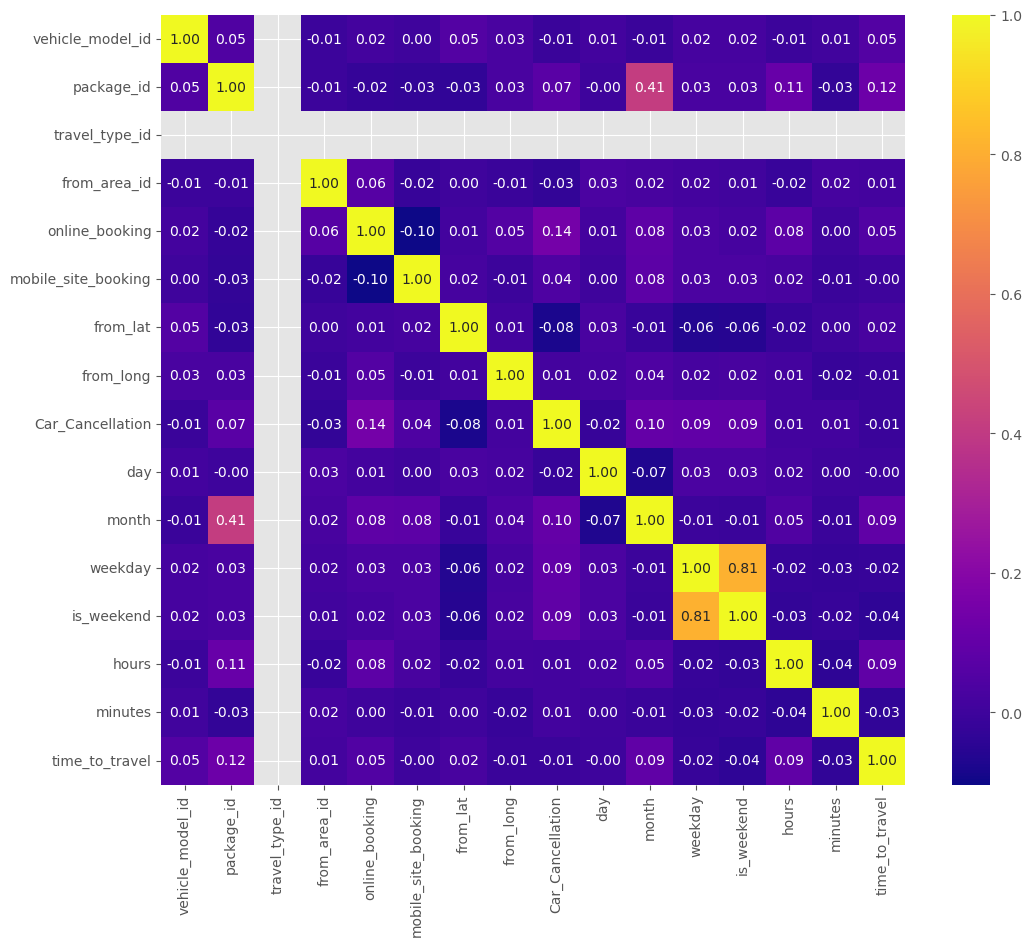

In [145]:
plt.figure(figsize=(12, 10))
sns.heatmap(df3.corr(), annot=True, cmap='plasma', fmt='.2f')
plt.show()

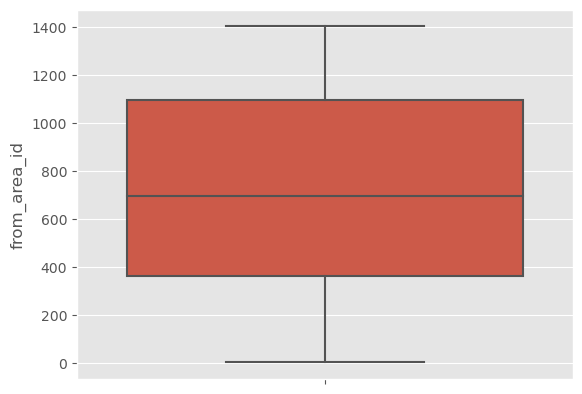

In [146]:
ax=sns.boxplot(y='from_area_id',data=df3)
plt.show()

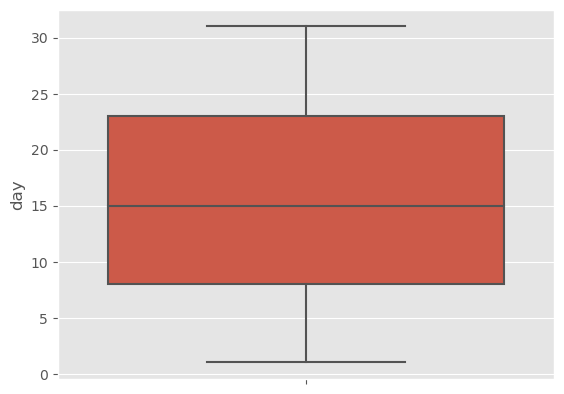

In [147]:
ax=sns.boxplot(y='day',data=df3)
plt.show()

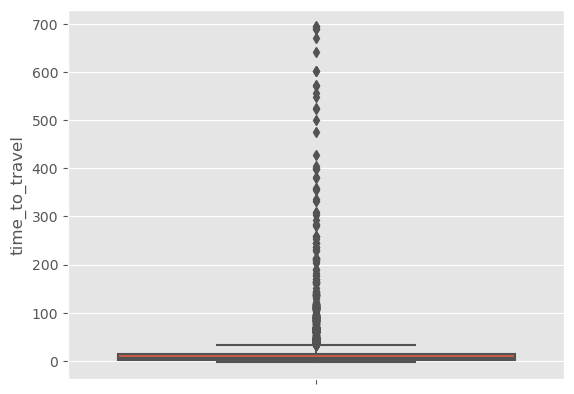

In [148]:
ax=sns.boxplot(y='time_to_travel',data=df3)
plt.show()

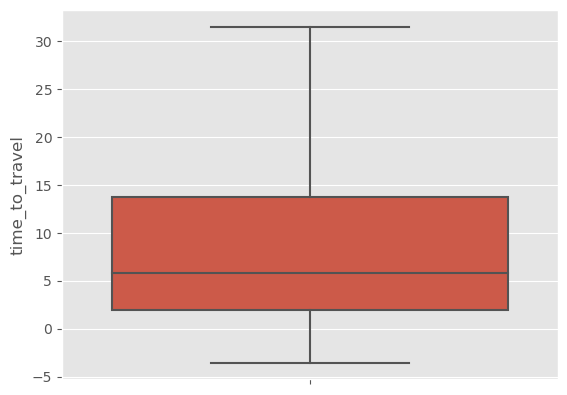

In [150]:
f1 = df3['time_to_travel'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr * 1.5)
df3['time_to_travel'].clip(lower=LB,upper=UB,inplace=True)
ax=sns.boxplot(y='time_to_travel',data=df3)
plt.show()

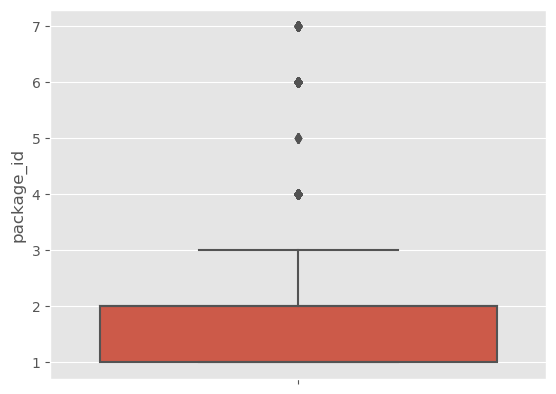

In [151]:
ax=sns.boxplot(y='package_id',data=df3)
plt.show()

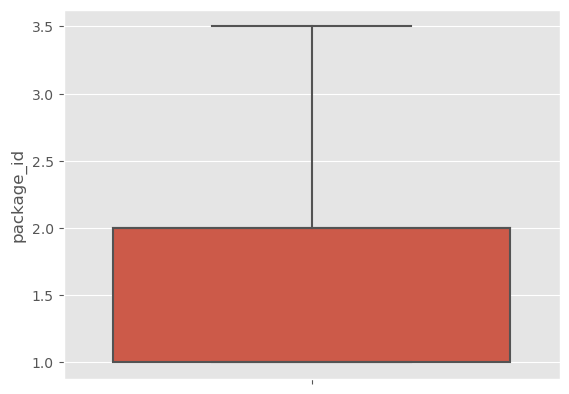

In [152]:
f1 = df3['package_id'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr * 1.5)
df3['package_id'].clip(lower=LB,upper=UB,inplace=True)
ax=sns.boxplot(y='package_id',data=df3)
plt.show()

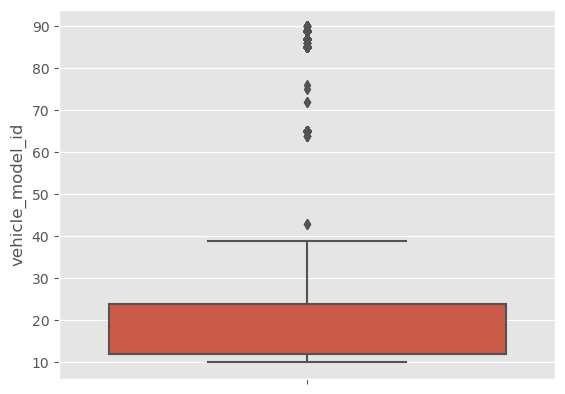

In [154]:
ax=sns.boxplot(y='vehicle_model_id',data=df3)
plt.show()

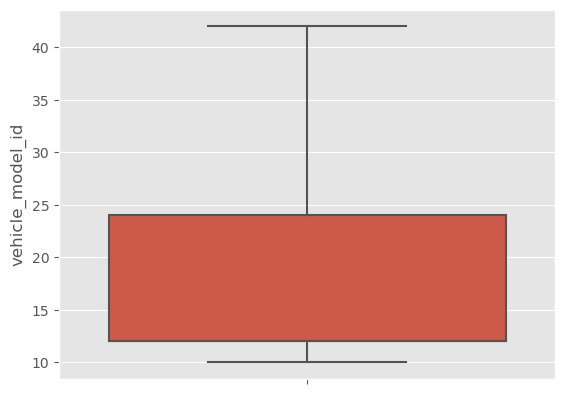

In [155]:
f1 = df3['vehicle_model_id'].sort_values(ascending=True)
q1 = f1.quantile(.25)
q3 = f1.quantile(.75)
iqr = q3 - q1
UB = q3 + (iqr * 1.5)
LB = q1 - (iqr * 1.5)
df3['vehicle_model_id'].clip(lower=LB,upper=UB,inplace=True)
ax=sns.boxplot(y='vehicle_model_id',data=df3)
plt.show()

In [156]:
#Decicion Tree

x = df3.drop(columns=['Car_Cancellation'])
y = df3['Car_Cancellation']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)

In [157]:
model_dt = DecisionTreeClassifier(random_state=1,max_depth=6)

model_dt.fit(x_train,y_train)

model_dt_score_train = model_dt.score(x_train,y_train)

model_dt_score_test = model_dt.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

Training Score 0.9625827814569536
Testing Score 0.956953642384106


In [158]:
model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=5, criterion='entropy')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

model_dt_ = DecisionTreeClassifier(random_state=1, max_depth=4, criterion='gini')
model_dt_.fit(x_train,y_train)

model_dt_score_train = model_dt_.score(x_train,y_train)

model_dt_score_test = model_dt_.score(x_test,y_test)

print('Training Score',model_dt_score_train)

print('Testing Score',model_dt_score_test)

Training Score 0.9562913907284768
Testing Score 0.9562913907284768
Training Score 0.9556291390728476
Testing Score 0.956953642384106


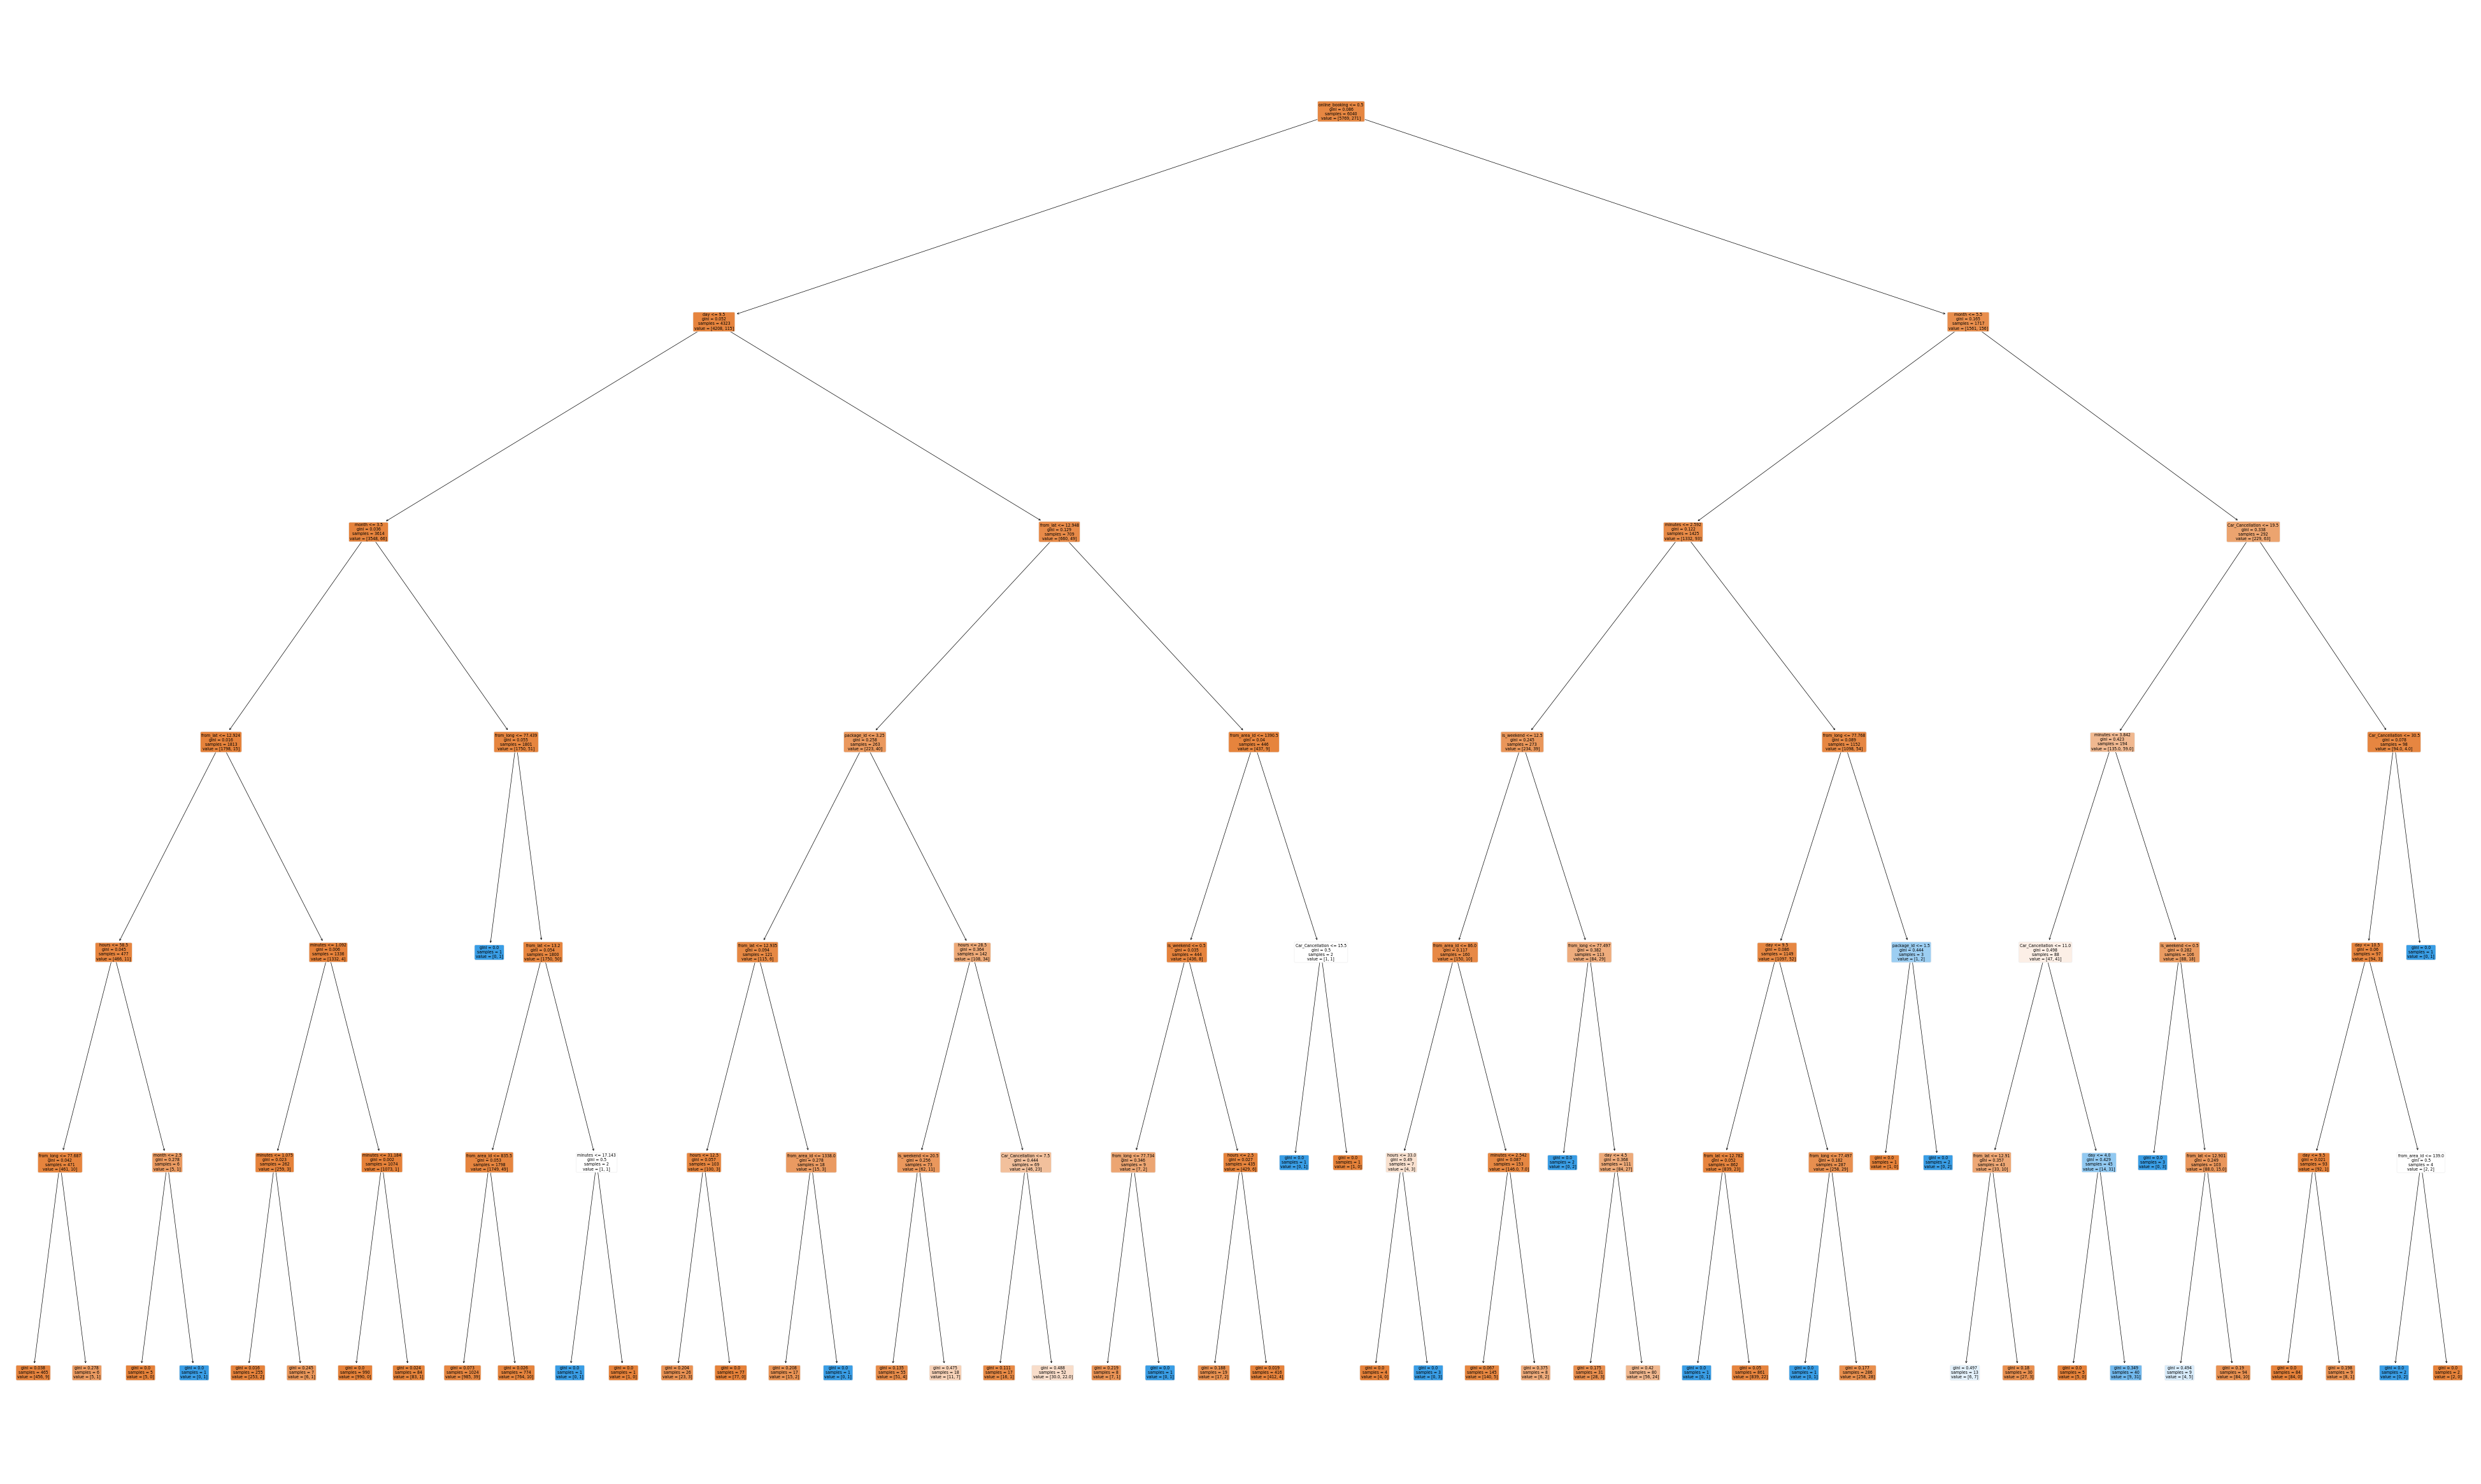

In [159]:
plt.figure(figsize=(50,30))  
plot_tree(model_dt, feature_names=df3.columns,filled=True, rounded=True)
plt.show()

In [160]:
y_pred_dt = model_dt.predict_proba(x_test)[:,1]
fpr_dt,tpr_dt,_ = roc_curve(y_test,y_pred_dt)

In [161]:
predictions = model_dt.predict(x_test)
print(confusion_matrix(y_test,predictions))

[[1435   10]
 [  55   10]]


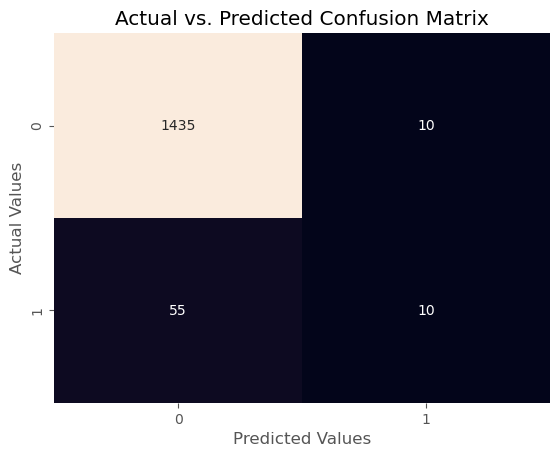

In [162]:
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [163]:
accuracy_score(y_test,predictions)

0.956953642384106

In [164]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1436    9]
 [  63    2]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1445
           1       0.18      0.03      0.05        65

    accuracy                           0.95      1510
   macro avg       0.57      0.51      0.51      1510
weighted avg       0.92      0.95      0.94      1510



In [165]:
accuracy_rate = []
error_rate = []
# May take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,df3['Car_Cancellation'],cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Accuracy Rate')

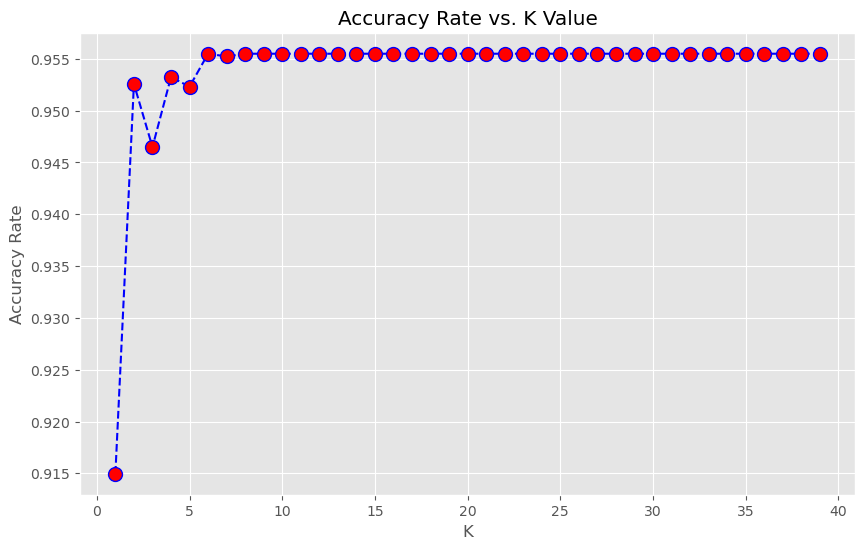

In [166]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [170]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=10')
print('\n')
print(f'Accuracy: {accuracy}')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


Accuracy: 0.8009554140127388
[[1445    0]
 [  65    0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1445
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1510
   macro avg       0.48      0.50      0.49      1510
weighted avg       0.92      0.96      0.94      1510



In [169]:
knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print(f'Accuracy: {accuracy}')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=30
Accuracy: 0.8009554140127388


[[1445    0]
 [  65    0]]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1445
           1       0.00      0.00      0.00        65

    accuracy                           0.96      1510
   macro avg       0.48      0.50      0.49      1510
weighted avg       0.92      0.96      0.94      1510



In [171]:
#naive bayes
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=25)
model = GaussianNB()

model.fit(xtrain, ytrain)
pred = model.predict(xtest)
print(pred[:150])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0]


[]

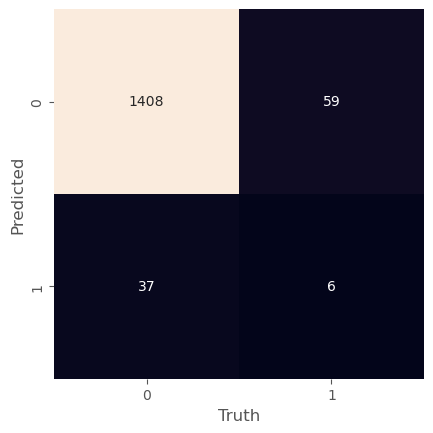

In [172]:
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

In [173]:
y_pred = pred
y_act = ytest
print(metrics.confusion_matrix(pred,ytest))
print(metrics.classification_report(pred, ytest))

[[1408   59]
 [  37    6]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1467
           1       0.09      0.14      0.11        43

    accuracy                           0.94      1510
   macro avg       0.53      0.55      0.54      1510
weighted avg       0.95      0.94      0.94      1510



In [174]:
#LOGISTICS REGRESSION
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)
standard_Scaler=StandardScaler()
x_train = standard_Scaler.fit_transform(x_train)
x_test = standard_Scaler.transform(x_test)
log_reg=LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [175]:
y_pred=log_reg.predict(x_test)
conf_matrix = confusion_matrix(y_test,y_pred)

Accuracy:  0.956953642384106
Precision:  0.0
Recall:  0.0


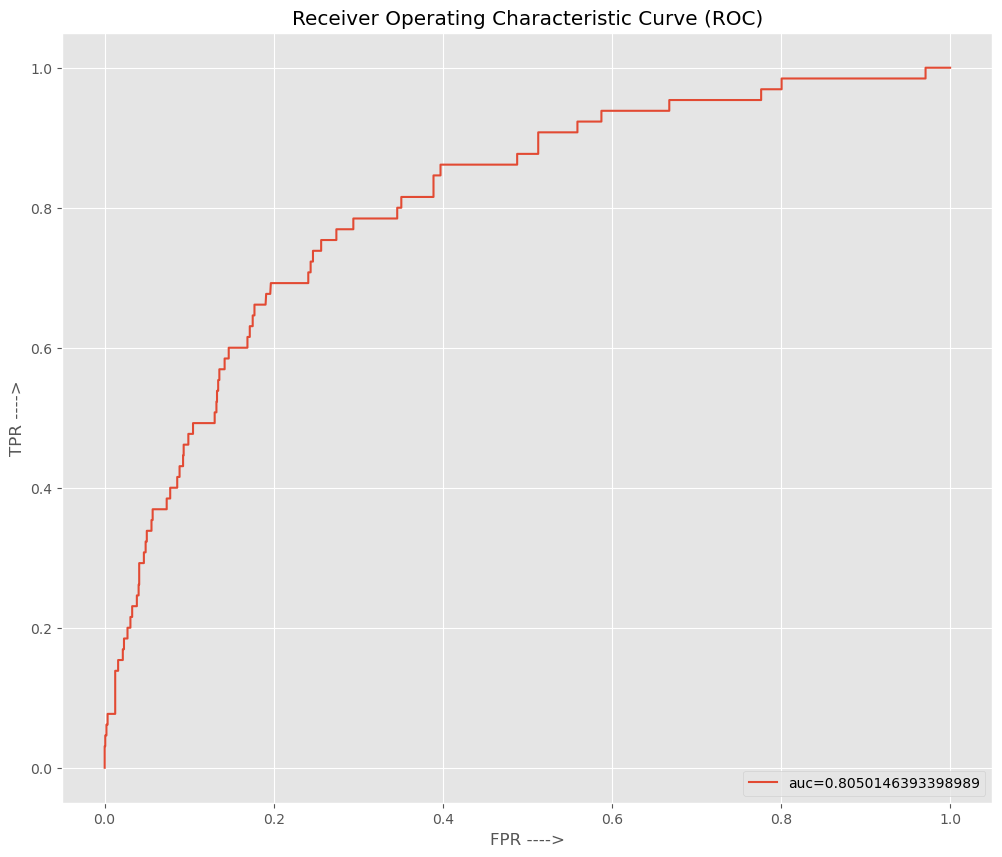

In [176]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))
print("Precision: ", metrics.precision_score(y_test,y_pred))
print("Recall: ", metrics.recall_score(y_test,y_pred))
y_pred_proba = log_reg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)



plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

end